# BT4012 Project Group 7

In [554]:
# Import libraries
# import warnings
# warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

pd.set_option('display.max_columns', 500)

## 1. Data Extraction

We extract and combine different raw data tables into train and test tables.

### 1.1 Data Importing

In [555]:
# Import train and test data
beneficiary_test = pd.read_csv("./data/Test_Beneficiarydata-1542969243754.csv")
inpatient_test = pd.read_csv("./data/Test_Inpatientdata-1542969243754.csv")
outpatient_test = pd.read_csv("./data/Test_Outpatientdata-1542969243754.csv")
test = pd.read_csv("./data/Test-1542969243754.csv")

beneficiary_train = pd.read_csv("./data/Train_Beneficiarydata-1542865627584.csv")
inpatient_train = pd.read_csv("./data/Train_Inpatientdata-1542865627584.csv")
outpatient_train = pd.read_csv("./data/Train_Outpatientdata-1542865627584.csv")
train = pd.read_csv("./data/Train-1542865627584.csv")

In [556]:
# Beneficiary train data
beneficiary_train.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50


In [557]:
# Inpatient train data
inpatient_train.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [558]:
# Outpatient train data
outpatient_train.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


In [559]:
# Labeled train data
train.head(2)

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes


### 1.2 Data Merging


In [560]:
# create binary columns to indicate Inpatient status (1)
inpatient_train['is_inpatient'] = 1
outpatient_train['is_inpatient'] = 0

inpatient_test['is_inpatient'] = 1
outpatient_test['is_inpatient'] = 0

In [561]:
# concat inpatient and outpatient datasets to form a single patient column
patient_train = pd.concat([inpatient_train, outpatient_train])

patient_test = pd.concat([inpatient_test, outpatient_test])

In [562]:
# left join with beneficiary data on BeneID
patient_train = pd.merge(patient_train, beneficiary_train, how='left', on='BeneID')

patient_test = pd.merge(patient_test, beneficiary_test, how='left', on='BeneID')

In [563]:
# left join with label on Provider
patient_train = pd.merge(patient_train, train, how='left', on='Provider')

patient_test = pd.merge(patient_test, test, how='left', on='Provider')

In [564]:
print(f"Shape of train data: {patient_train.shape}")
print(f"Shape of test data: {patient_test.shape}")
# Test data is not labelled

Shape of train data: (558211, 56)
Shape of test data: (135392, 55)


## 2. Feature Engineering

We relabel, encode and aggregate data as there are too many feature columns in our dataset, some of which are not very meaningful in raw data form.

### 2.1 Data Clarification
- Changing binary boolean features to 0/1 values (all Chronic Conditions and RenalDiseaseIndicator) 
- Replacing target label (`PotentialFraud`) to a binary value


In [565]:
# Replacing 2 with 0 for chronic conditions.

patient_train = patient_train.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

patient_train = patient_train.replace({'RenalDiseaseIndicator': 'Y'}, 1)
patient_train = patient_train.replace({'RenalDiseaseIndicator': '0'}, 0)

patient_test = patient_test.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

patient_test = patient_test.replace({'RenalDiseaseIndicator': 'Y'}, 1)
patient_test = patient_test.replace({'RenalDiseaseIndicator': '0'}, 0)

In [566]:
patient_train['PotentialFraud'] = patient_train['PotentialFraud'].replace({'Yes': 1, 'No': 0})

### 2.2 Feature Engineering
For Date Columns
- Create ClaimProcessedForDays from `ClaimStartDt` and `ClaimEndDt`
- Create Age, IsDead feature from `DOB` and `DOD`
- Create AdmitForDays from `AdmissionDT` and `DischargeDT`

In [567]:
date_cols= ['ClaimStartDt', 'ClaimEndDt', 'DOB', 'DOD', 'AdmissionDt', 'DischargeDt']
# Cast to Datetime Data Type
patient_train[date_cols] = patient_train[date_cols].apply(pd.to_datetime, format = '%Y-%m-%d', errors='ignore')
patient_test[date_cols] = patient_test[date_cols].apply(pd.to_datetime, format = '%Y-%m-%d', errors='ignore')

In [568]:
# For Train data
# Create 'ClaimProcessedForDays' indicating number of days the claim takes to process
patient_train['ClaimProcessedForDays'] = ((patient_train['ClaimEndDt'] - patient_train['ClaimStartDt']).dt.days)+1

# Create 'Age' indicating age of patient at latest day/DOD
patient_train['Age'] = round(((patient_train['DOD'] - patient_train['DOB']).dt.days)/365)
## For rows without DOD, we will calculate age of other benficiaries from the last DOD value (2009-12-01).
patient_train.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - patient_train['DOB']).dt.days)/365), inplace=True)

# Create 'isDead' with flag 1 means Dead and 0 means not Dead 
patient_train.loc[patient_train.DOD.isna(),'isDead']=0
patient_train.loc[patient_train.DOD.notna(),'isDead']=1

patient_train.loc[patient_train.DOD.isna(),'isDead']=0
patient_train.loc[patient_train.DOD.notna(),'isDead']=1

# Create 'AdmitForDays' indicating number of days patient was admitted in hospital (only for inpatient)
patient_train['AdmitForDays'] = ((patient_train['DischargeDt'] - patient_train['AdmissionDt']).dt.days)+1
patient_train['AdmitForDays'] = patient_train['AdmitForDays'].fillna(0) # for outpatient, default 0 days admitted


In [569]:
# For Test data
# Create 'ClaimProcessedForDays' indicating number of days the claim takes to process
patient_test['ClaimProcessedForDays'] = ((patient_test['ClaimEndDt'] - patient_test['ClaimStartDt']).dt.days)+1

# Create 'Age' indicating age of patient at latest day/DOD
patient_test['Age'] = round(((patient_test['DOD'] - patient_test['DOB']).dt.days)/365)
## For rows without DOD, we will calculate age of other benficiaries from the last DOD value (2009-12-01).
patient_test.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - patient_test['DOB']).dt.days)/365), inplace=True)

# Create 'isDead' with flag 1 means Dead and 0 means not Dead 
patient_test.loc[patient_test.DOD.isna(),'isDead']=0
patient_test.loc[patient_test.DOD.notna(),'isDead']=1

patient_test.loc[patient_test.DOD.isna(),'isDead']=0
patient_test.loc[patient_test.DOD.notna(),'isDead']=1

# Create 'AdmitForDays' indicating number of days patient was admitted in hospital (only for inpatient)
patient_test['AdmitForDays'] = ((patient_test['DischargeDt'] - patient_test['AdmissionDt']).dt.days)+1
patient_test['AdmitForDays'] = patient_test['AdmitForDays'].fillna(0) # for outpatient, default 0 days admitted

## Data Preprocessing


In [570]:
# trim 'ClmProcedureCode_6' column as it is completely filled with Nan values
trimmed_patient_train = patient_train.drop(columns=['ClmProcedureCode_6'])
trimmed_patient_test = patient_test.drop(columns=['ClmProcedureCode_6'])

### 3.1 Data Imputation
- Handling missing values in `DeductibleAmtPaid` and `DiagnosisGroupCode`

In [571]:
# For DeductibleAmtPaid, assign missing amount to be 0
trimmed_patient_train['DeductibleAmtPaid'].fillna(0, inplace=True)
trimmed_patient_test['DeductibleAmtPaid'].fillna(0, inplace=True)

In [572]:
# for DiagnosisGroupCode, assign a placeholder value of '000'
trimmed_patient_train['DiagnosisGroupCode'].fillna('000', inplace=True)
trimmed_patient_test['DiagnosisGroupCode'].fillna('000', inplace=True)

### 3.2 Categorical Encoding
- Categorical data (Race, Gender, State, County) are already categorically encoded

In [573]:
# Convert the columns to categorical data type
categorical_columns = ['Race', 'Gender', 'State', 'County']

trimmed_patient_train[categorical_columns] = trimmed_patient_train[categorical_columns].astype('category')
trimmed_patient_test[categorical_columns] = trimmed_patient_test[categorical_columns].astype('category')

### 3.3 Frequency Encoding
- Count encoding all the multi-label feature `diagnosis_codes`, `procedure_codes`, `physician_codes`
- All Nan values are encoded 0

In [574]:
# List of codes columns - for physicians, diagnosis and procedure
freq_encoding_cols = {
"Physician Codes" : ['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'],

"Diagnosis Codes" : ['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 
                   'ClmDiagnosisCode_4','ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 
                   'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9','ClmDiagnosisCode_10'],

"Procedure Codes" : ['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 
                   'ClmProcedureCode_5'],

"Diagnosis Group Codes" : ['DiagnosisGroupCode']
}

In [575]:
# CountEncode each code group columns (Both Train and Test)
for k, code_cols in freq_encoding_cols.items():
    ec = ce.CountEncoder()
    # fit Encoder on stacked train data of each code group
    ec = ec.fit(trimmed_patient_train[code_cols].stack(dropna=True).astype('O'))
    # transform each column of the code group
    for col in code_cols:
        trimmed_patient_train[col + "_ce"] = ec.transform(trimmed_patient_train[col].rename(0))
        trimmed_patient_train[col + "_ce"] = trimmed_patient_train[col + "_ce"].astype('category')
        trimmed_patient_test[col + "_ce"] = ec.transform(trimmed_patient_test[col].rename(0))
        trimmed_patient_test[col + "_ce"] = trimmed_patient_test[col + "_ce"].astype('category')
    print(f"Complete encoding for {k}")

Complete encoding for Physician Codes
Complete encoding for Diagnosis Codes
Complete encoding for Procedure Codes
Complete encoding for Diagnosis Group Codes


## 4. Exploratory Data Analysis

We explore `PotentialFraud` Proportion of different Features in Train data.

### 4.1 Overall Proportion

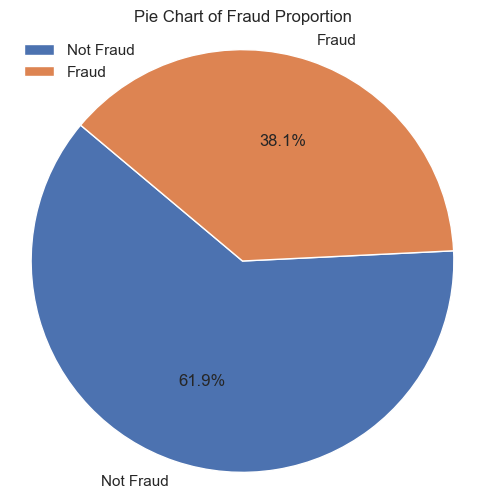

In [576]:
#@title Distribution of Fraud and non-Fraud

fraud_counts = patient_train['PotentialFraud'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.title('Pie Chart of Fraud Proportion')
plt.legend()
plt.show()

### 4.2 Proportion by Categorical Features

In [577]:
# %pip install seaborn==0.13.0

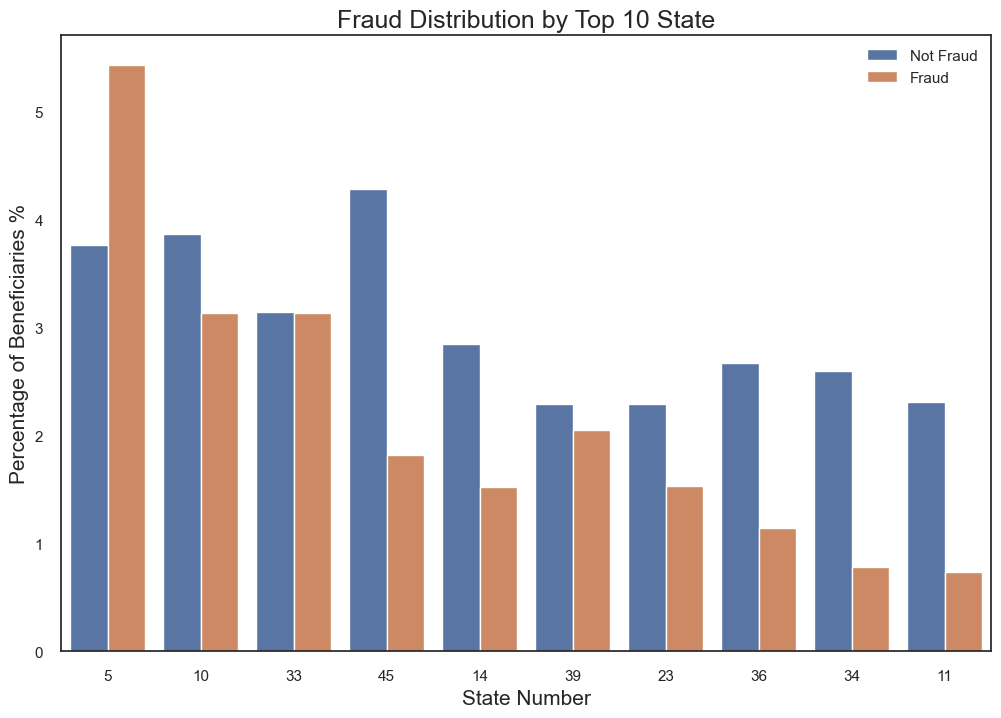

In [578]:
#@title Distribution of Frauds across top 10 States
sns.set(rc={'figure.figsize':(12,8)},style='white')
sns.countplot(x='State',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train['State'].value_counts().iloc[:10].index)

plt.title("Fraud Distribution by Top 10 State",fontsize=18)
plt.xlabel("State Number",fontsize=15)
plt.ylabel("Percentage of Beneficiaries %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
plt.show()

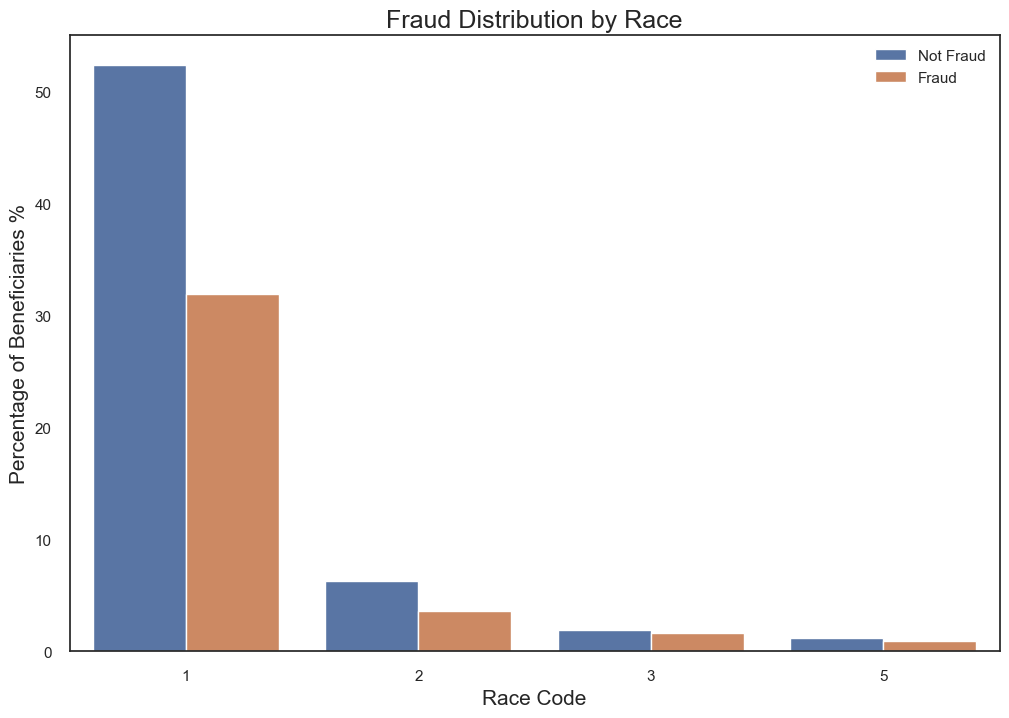

In [579]:
#@title Distribution of Race-wise beneficiaries
sns.set(rc={'figure.figsize':(12,8)},style='white')
sns.countplot(x='Race',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train['Race'].value_counts().iloc[:10].index)

plt.title("Fraud Distribution by Race",fontsize=18)
plt.xlabel("Race Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
plt.show()


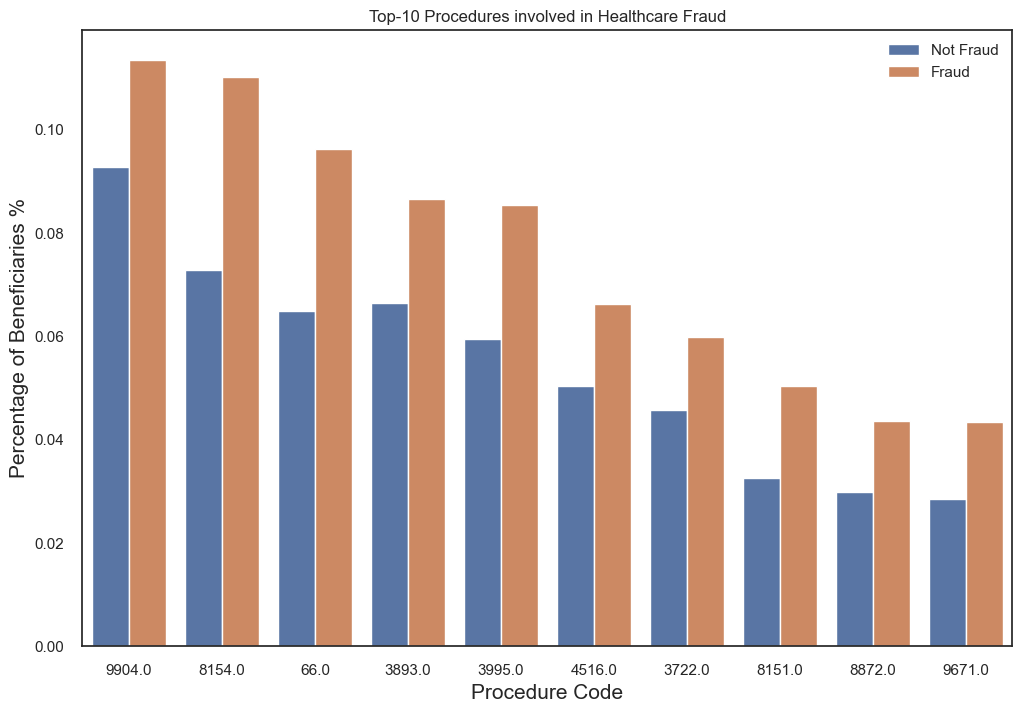

In [580]:
#@title Distribution of Fraud across top 10 Procedures

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='ClmProcedureCode_1',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train.ClmProcedureCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Procedures involved in Healthcare Fraud')
plt.xlabel("Procedure Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
    
plt.show()


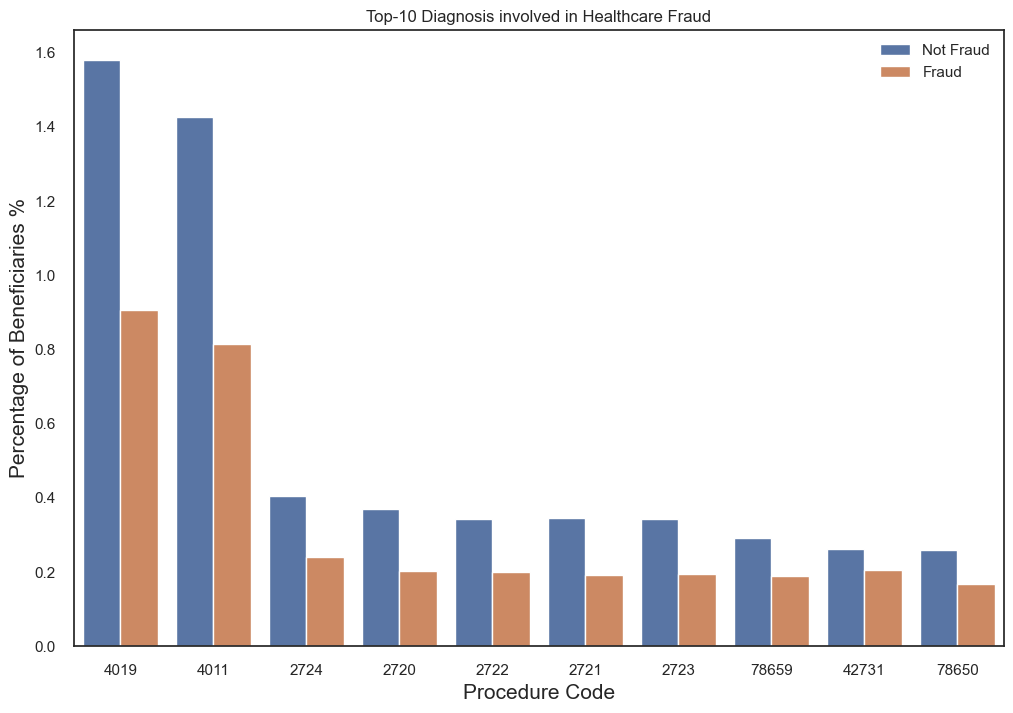

In [581]:
#@title Distribution of Fraud across top 10 Diagnosis

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='ClmDiagnosisCode_1',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train.ClmDiagnosisCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Diagnosis involved in Healthcare Fraud')
plt.xlabel("Procedure Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
    
plt.show()

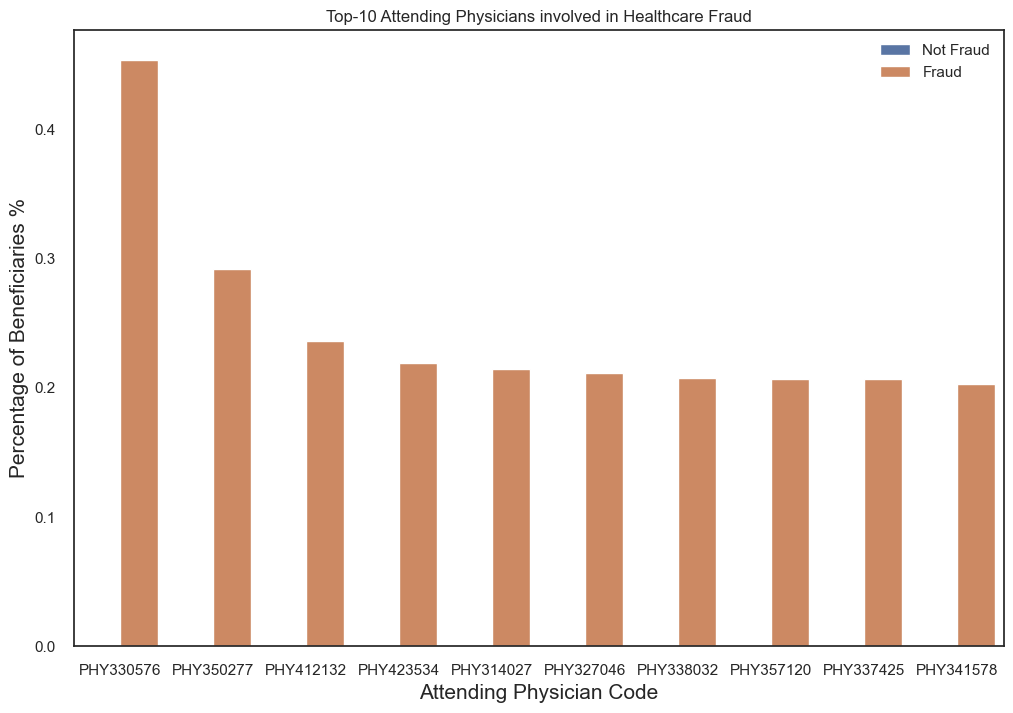

In [582]:
#@title Distribution of Fraud across Attending Physicians

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='AttendingPhysician',hue='PotentialFraud',data=patient_train, stat='percent'
              ,order=patient_train.AttendingPhysician.value_counts().iloc[:10].index)

plt.title('Top-10 Attending Physicians involved in Healthcare Fraud')
plt.xlabel("Attending Physician Code",fontsize=15)
plt.ylabel("Percentage of Beneficiaries %",fontsize=15)
plt.legend(labels=['Not Fraud', 'Fraud'])
    
plt.show()

### 4.3 Distribution of Numerical Features

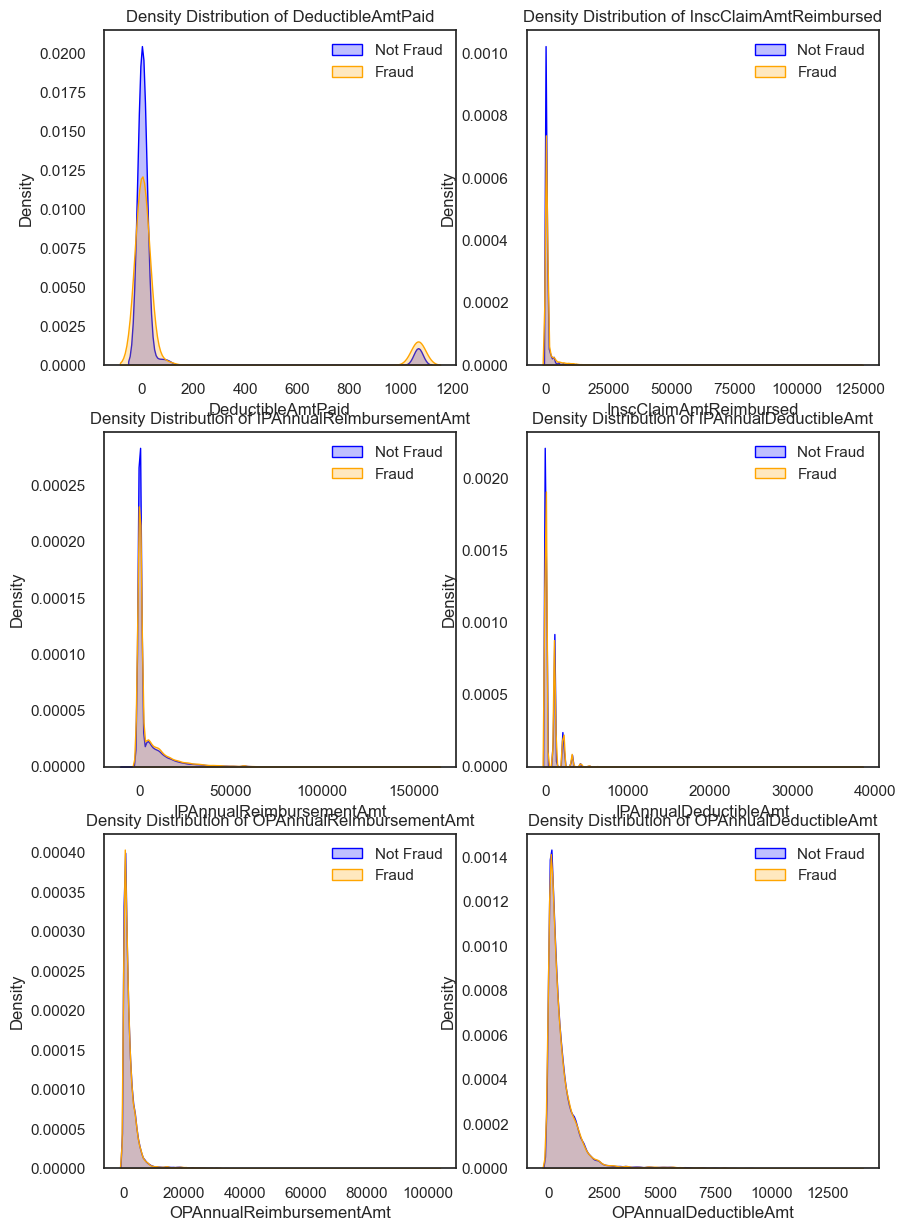

In [583]:
#@title Density Distribution of Numerical features
selected_col =  ['DeductibleAmtPaid', 'InscClaimAmtReimbursed', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
            'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']

num_rows = (len(selected_col) + 3) // 2  # Adjust based on the desired layout
num_cols = 2

plt.figure(figsize=(10, 5*num_rows))
for idx, column in enumerate(selected_col, start=1):
    plt.subplot(num_rows, num_cols, idx)
    sns.kdeplot(patient_train[patient_train['PotentialFraud'] == 0][column], fill=True, color="blue", label="Not Fraud")
    sns.kdeplot(patient_train[patient_train['PotentialFraud'] == 1][column], fill=True, color="orange", label="Fraud")
    plt.title(f"Density Distribution of {column}")
    plt.legend()

plt.show()

#### Missing OperatingPhysician --  check that all missing rows are associated with outpatient

Assumption: Patients who dont stay in the hospital do not require surgery, hence is Missing at Random

In [584]:
patient_train[patient_train['OperatingPhysician'].isna()]['is_inpatient'].unique()

array([1, 0])

Operating Physicians are present for both inpatient and outpatient. Maybe Operating Physicians can operate on outpatients too. Check distribution of missing vs non missing Operating Physicians on inpatient vs outpatients

<Axes: xlabel='OperatingPhysician_temp', ylabel='count'>

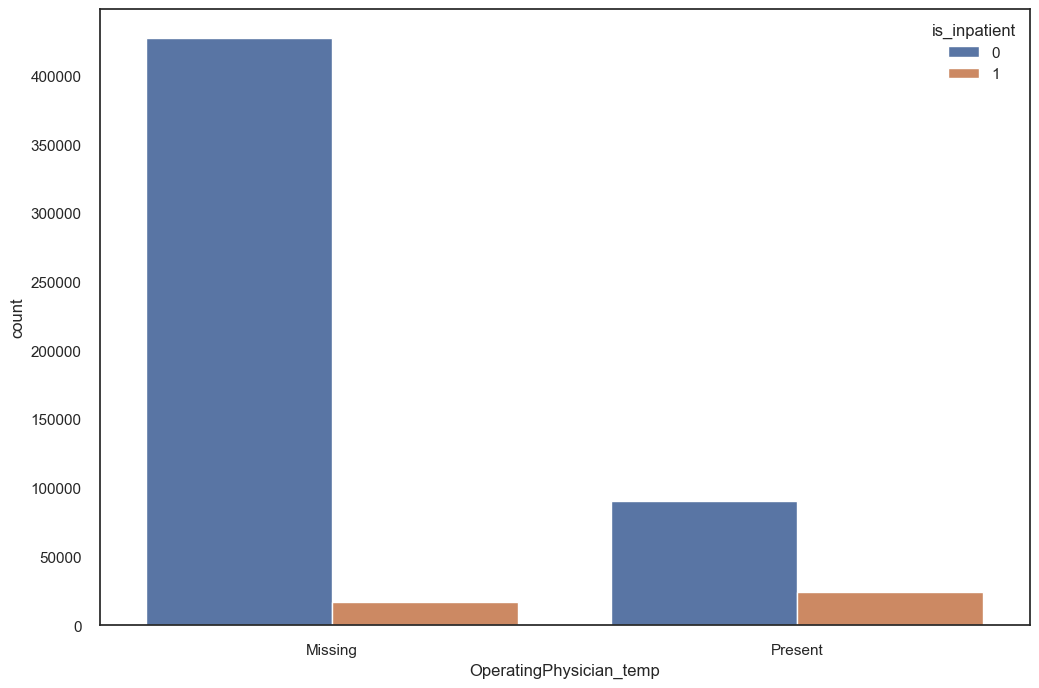

In [585]:
patient_train['OperatingPhysician_temp'] = patient_train['OperatingPhysician'].apply(lambda x: "Missing" if pd.isnull(x) else "Present")
sns.countplot(data=patient_train, x='OperatingPhysician_temp', hue='is_inpatient')

## 5. Data Uploading

### 5.1 Obtain relevant columns
- Keep newly engineered features, categorical features, encoded features and scaled numerical features
- Ignore date columns, codes columns
- Upload to X_train, y_train and X_test json file

In [586]:
relevant_cols = ['BeneID', 'ClaimID', 'Provider',
       'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'is_inpatient', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'isDead',
       'AdmitForDays', 'ClaimProcessedForDays', 'AttendingPhysician_ce',
       'OperatingPhysician_ce', 'OtherPhysician_ce',
       'ClmAdmitDiagnosisCode_ce', 'ClmDiagnosisCode_1_ce',
       'ClmDiagnosisCode_2_ce', 'ClmDiagnosisCode_3_ce',
       'ClmDiagnosisCode_4_ce', 'ClmDiagnosisCode_5_ce',
       'ClmDiagnosisCode_6_ce', 'ClmDiagnosisCode_7_ce',
       'ClmDiagnosisCode_8_ce', 'ClmDiagnosisCode_9_ce',
       'ClmDiagnosisCode_10_ce', 'ClmProcedureCode_1_ce',
       'ClmProcedureCode_2_ce', 'ClmProcedureCode_3_ce',
       'ClmProcedureCode_4_ce', 'ClmProcedureCode_5_ce', 'DiagnosisGroupCode_ce']
target_col = ['BeneID', 'Provider', 'PotentialFraud']

In [587]:
# X_train, y_train, and X_test
X_train = trimmed_patient_train[relevant_cols]
y_train = trimmed_patient_train[target_col]
X_test = trimmed_patient_test[relevant_cols]

num_rows = X_train.shape[0]
split_index = num_rows // 2

# Split the DataFrame into two equal parts
X_train1 = X_train.iloc[:split_index]
X_train2 = X_train.iloc[split_index:]

# Save X_train, y_train, and X_test to csv files
X_train1.to_csv('X_train1.csv', index=False)
X_train2.to_csv('X_train2.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)

## 6. Automated Feature Engineering
Now that we have cleaned and preprocessed our data, we can engineer features relevant to predicting fraudulent providers. Instead of generating it manually, we will make use of a technique known as automated feature engineering to help us generate more features. In particular, we will utilise deep feature synthesis from the featuretools library to help us with this process. Deep feature synthesis applies mathematical operations on existing features and stacks them together to create new features. Subsequently, we can test and see the effectiveness of these new features in helping us to predict medicare fraud.

In [588]:
# Please uncomment and run this line if you don't have featuretools installed
# %pip install featuretools

import featuretools as ft

### 6.1 Import Preprocessed Datasets 

**Note: The X_test.csv does not contain labels, while the X_train1.csv and X_train2.csv contains labels.**

Since we are going to be creating supervised and unsupervised models, it is important to note that we can only use the X_train1.csv and X_train2.csv to train and test our supervised models.

Hence to avoid confusion on the nature of the dataset when importing, we will import X_train1.csv, X_train2.csv and y_train.csv as X_labeled1, X_labeled2 and y_labels respectively. In addition, we will import X_test as X_test_unlabeled. 

Further down, x_train, x_test, y_train and y_test **<u>will only be obtained from the labeled data</u>** when we have to create our supervised models.

In [589]:
# Load preprocessed datasets
X_labeled1 = pd.read_csv('X_train1.csv')
X_labeled2 = pd.read_csv('X_train2.csv')
y_labels = pd.read_csv('y_train.csv')
X_test_unlabeled = pd.read_csv('X_test.csv')
X_labeled_full = pd.concat([X_train1, X_train2]) # Combine into 1 training set

# As labels were provided for fraudulent providers only, we will retain the providers in our y_labels only.
y_providers = y_labels[['Provider', 'PotentialFraud']].drop_duplicates(ignore_index=True)

# Next we drop the labels in X_labeled_full
X_full = X_labeled_full[X_labeled_full.columns.difference(['BeneID', 'PotentialFraud'])]

display(X_full.head())
display(y_providers.head())

,AdmitForDays,Age,AttendingPhysician_ce,ChronicCond_Alzheimer,ChronicCond_Cancer,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_Heartfailure,ChronicCond_IschemicHeart,ChronicCond_KidneyDisease,ChronicCond_ObstrPulmonary,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,ClaimID,ClaimProcessedForDays,ClmAdmitDiagnosisCode_ce,ClmDiagnosisCode_10_ce,ClmDiagnosisCode_1_ce,ClmDiagnosisCode_2_ce,ClmDiagnosisCode_3_ce,ClmDiagnosisCode_4_ce,ClmDiagnosisCode_5_ce,ClmDiagnosisCode_6_ce,ClmDiagnosisCode_7_ce,ClmDiagnosisCode_8_ce,ClmDiagnosisCode_9_ce,ClmProcedureCode_1_ce,ClmProcedureCode_2_ce,ClmProcedureCode_3_ce,ClmProcedureCode_4_ce,ClmProcedureCode_5_ce,County,DeductibleAmtPaid,DiagnosisGroupCode_ce,Gender,IPAnnualDeductibleAmt,IPAnnualReimbursementAmt,InscClaimAmtReimbursed,NoOfMonths_PartACov,NoOfMonths_PartBCov,OPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OperatingPhysician_ce,OtherPhysician_ce,Provider,Race,RenalDiseaseIndicator,State,isDead,is_inpatient
0,7.0,67.0,1.0,1,0,1,1,0,1,1,0,0,1,1,CLM46614,7,955.0,0.0,748.0,79788.0,4251.0,630.0,4673.0,6980.0,37270.0,341.0,5266.0,0.0,0.0,0.0,0.0,0.0,230,1068.0,129,1,3204,36000,26000,12,12,70,60,0.0,0.0,PRV55912,1,0,39,0.0,1
1,3.0,67.0,3.0,1,0,1,1,0,1,1,0,0,1,1,CLM66048,3,57.0,0.0,57.0,5182.0,3461.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,230,1068.0,16,1,3204,36000,5000,12,12,70,60,3.0,0.0,PRV55907,1,0,39,0.0,1
2,4.0,67.0,12.0,1,0,1,1,0,1,1,0,0,1,1,CLM68358,4,1041.0,0.0,170.0,550.0,3416.0,2177.0,836.0,2242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230,1068.0,160,1,3204,36000,5000,12,12,70,60,0.0,14.0,PRV56046,1,0,39,0.0,1
3,9.0,96.0,55.0,0,0,1,1,1,0,1,0,0,1,1,CLM38412,9,360.0,0.0,2077.0,1423.0,630.0,2242.0,163.0,2941.0,412.0,5427.0,79788.0,100.0,0.0,0.0,0.0,0.0,360,1068.0,38,2,1068,5000,5000,12,12,320,250,12.0,15.0,PRV52405,2,0,1,0.0,1
4,18.0,72.0,2.0,0,0,1,0,1,1,1,1,0,0,0,CLM63689,18,1937.0,0.0,680.0,9099.0,292.0,5384.0,2765.0,6242.0,2442.0,580.0,831.0,854.0,0.0,0.0,0.0,0.0,780,1068.0,5,2,2136,21260,10000,12,12,100,120,5.0,0.0,PRV56614,1,1,45,0.0,1


,Provider,PotentialFraud
0,PRV55912,1
1,PRV55907,0
2,PRV56046,0
3,PRV52405,0
4,PRV56614,0


### 6.2 Train-Test Split

As deep feature synthesis carries out aggregation operations on our data, we will have to scale our data to avoid imbalancing issues. However, to avoid data leakage, we will need to prepare our scaler on training data and then use it to fit our test data. 

Thus we will first train-test split our data.

**Note: As we are aggregating over Provider, we will utilise GroupShuffleSplit to split the data by Provider to ensure that there is no train-test contamination.**

In [590]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(n_splits=2, test_size=.2, random_state=4012)
split = gss.split(X_full, groups=X_full.Provider)
train_ix, test_ix = next(split)

X_train = X_full.loc[train_ix]
X_test = X_full.loc[test_ix]

providers_train = X_train.Provider.unique()
providers_test = X_test.Provider.unique()
y_train = y_providers[y_providers.Provider.isin(providers_train)]
y_test = y_providers[y_providers.Provider.isin(providers_test)]

In [591]:
# View X_train
display(X_train.head())
print(X_train.shape)

,AdmitForDays,Age,AttendingPhysician_ce,ChronicCond_Alzheimer,ChronicCond_Cancer,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_Heartfailure,ChronicCond_IschemicHeart,ChronicCond_KidneyDisease,ChronicCond_ObstrPulmonary,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,ClaimID,ClaimProcessedForDays,ClmAdmitDiagnosisCode_ce,ClmDiagnosisCode_10_ce,ClmDiagnosisCode_1_ce,ClmDiagnosisCode_2_ce,ClmDiagnosisCode_3_ce,ClmDiagnosisCode_4_ce,ClmDiagnosisCode_5_ce,ClmDiagnosisCode_6_ce,ClmDiagnosisCode_7_ce,ClmDiagnosisCode_8_ce,ClmDiagnosisCode_9_ce,ClmProcedureCode_1_ce,ClmProcedureCode_2_ce,ClmProcedureCode_3_ce,ClmProcedureCode_4_ce,ClmProcedureCode_5_ce,County,DeductibleAmtPaid,DiagnosisGroupCode_ce,Gender,IPAnnualDeductibleAmt,IPAnnualReimbursementAmt,InscClaimAmtReimbursed,NoOfMonths_PartACov,NoOfMonths_PartBCov,OPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OperatingPhysician_ce,OtherPhysician_ce,Provider,Race,RenalDiseaseIndicator,State,isDead,is_inpatient
1,3.0,67.0,3.0,1,0,1,1,0,1,1,0,0,1,1,CLM66048,3,57.0,0.0,57.0,5182.0,3461.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,230,1068.0,16,1,3204,36000,5000,12,12,70,60,3.0,0.0,PRV55907,1,0,39,0.0,1
2,4.0,67.0,12.0,1,0,1,1,0,1,1,0,0,1,1,CLM68358,4,1041.0,0.0,170.0,550.0,3416.0,2177.0,836.0,2242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,230,1068.0,160,1,3204,36000,5000,12,12,70,60,0.0,14.0,PRV56046,1,0,39,0.0,1
3,9.0,96.0,55.0,0,0,1,1,1,0,1,0,0,1,1,CLM38412,9,360.0,0.0,2077.0,1423.0,630.0,2242.0,163.0,2941.0,412.0,5427.0,79788.0,100.0,0.0,0.0,0.0,0.0,360,1068.0,38,2,1068,5000,5000,12,12,320,250,12.0,15.0,PRV52405,2,0,1,0.0,1
6,6.0,70.0,8.0,1,1,0,0,1,1,0,0,1,1,0,CLM32075,6,173.0,0.0,185.0,7534.0,652.0,1290.0,13398.0,79788.0,5182.0,8333.0,4499.0,82.0,0.0,0.0,0.0,0.0,120,1068.0,64,1,1068,8000,8000,12,12,50,860,4.0,0.0,PRV54090,2,0,24,0.0,1
7,5.0,68.0,5.0,0,0,0,1,0,1,0,0,1,0,0,CLM62376,5,7304.0,0.0,327.0,39724.0,4984.0,7534.0,1009.0,15171.0,2197.0,4499.0,15246.0,1152.0,0.0,0.0,0.0,0.0,230,1068.0,79,1,1068,6000,6000,12,12,0,0,19.0,0.0,PRV51148,1,0,38,0.0,1


(447666, 51)


In [592]:
# View y_train
display(y_train.head())
print(y_train.shape)

,Provider,PotentialFraud
1,PRV55907,0
2,PRV56046,0
3,PRV52405,0
6,PRV54090,0
7,PRV51148,1


(4328, 2)


In [593]:
# View X_test
display(X_test.head())
print(X_test.shape)

,AdmitForDays,Age,AttendingPhysician_ce,ChronicCond_Alzheimer,ChronicCond_Cancer,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_Heartfailure,ChronicCond_IschemicHeart,ChronicCond_KidneyDisease,ChronicCond_ObstrPulmonary,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,ClaimID,ClaimProcessedForDays,ClmAdmitDiagnosisCode_ce,ClmDiagnosisCode_10_ce,ClmDiagnosisCode_1_ce,ClmDiagnosisCode_2_ce,ClmDiagnosisCode_3_ce,ClmDiagnosisCode_4_ce,ClmDiagnosisCode_5_ce,ClmDiagnosisCode_6_ce,ClmDiagnosisCode_7_ce,ClmDiagnosisCode_8_ce,ClmDiagnosisCode_9_ce,ClmProcedureCode_1_ce,ClmProcedureCode_2_ce,ClmProcedureCode_3_ce,ClmProcedureCode_4_ce,ClmProcedureCode_5_ce,County,DeductibleAmtPaid,DiagnosisGroupCode_ce,Gender,IPAnnualDeductibleAmt,IPAnnualReimbursementAmt,InscClaimAmtReimbursed,NoOfMonths_PartACov,NoOfMonths_PartBCov,OPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OperatingPhysician_ce,OtherPhysician_ce,Provider,Race,RenalDiseaseIndicator,State,isDead,is_inpatient
0,7.0,67.0,1.0,1,0,1,1,0,1,1,0,0,1,1,CLM46614,7,955.0,0.0,748.0,79788.0,4251.0,630.0,4673.0,6980.0,37270.0,341.0,5266.0,0.0,0.0,0.0,0.0,0.0,230,1068.0,129,1,3204,36000,26000,12,12,70,60,0.0,0.0,PRV55912,1,0,39,0.0,1
4,18.0,72.0,2.0,0,0,1,0,1,1,1,1,0,0,0,CLM63689,18,1937.0,0.0,680.0,9099.0,292.0,5384.0,2765.0,6242.0,2442.0,580.0,831.0,854.0,0.0,0.0,0.0,0.0,780,1068.0,5,2,2136,21260,10000,12,12,100,120,5.0,0.0,PRV56614,1,1,45,0.0,1
5,7.0,70.0,50.0,1,1,0,1,1,1,1,1,0,1,1,CLM70950,7,1915.0,0.0,405.0,768.0,2275.0,10181.0,158.0,203.0,5182.0,39724.0,3085.0,13.0,0.0,0.0,0.0,0.0,270,1068.0,35,2,2136,22000,8000,12,12,840,1400,50.0,50.0,PRV54986,1,0,31,0.0,1
10,9.0,64.0,31.0,1,0,1,1,1,1,1,1,0,1,1,CLM57949,9,7304.0,0.0,200.0,296.0,501.0,1423.0,5266.0,12185.0,805.0,868.0,2574.0,307.0,0.0,0.0,0.0,0.0,760,1068.0,90,2,2136,131140,102000,12,12,80,1650,23.0,0.0,PRV55193,1,0,34,0.0,1
13,6.0,87.0,19.0,0,0,1,1,1,1,1,1,0,1,0,CLM54944,6,3790.0,0.0,3790.0,1143.0,4603.0,3416.0,7938.0,15171.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150,1068.0,153,2,2136,23000,6000,12,12,370,620,0.0,0.0,PRV52283,1,0,10,0.0,1


(110545, 51)


In [594]:
# View y_test
display(y_test.head())
print(y_test.shape)

,Provider,PotentialFraud
0,PRV55912,1
4,PRV56614,0
5,PRV54986,1
10,PRV55193,1
13,PRV52283,1


(1082, 2)


### 6.3 Data Scaling
Now that we have our train and test set, we will proceed to scale our data using MinMax scaling.

In [595]:
# Initiate a Scaler
minmaxScaler = MinMaxScaler()

# Fit the scaler on train numerical data
numerical_cols = X_train.columns.difference(['ClaimID', 'Provider'])
minmaxScaler.fit(X_train[numerical_cols])

# Transform train and test numerical data
X_train[numerical_cols] = minmaxScaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = minmaxScaler.transform(X_test[numerical_cols])

### 6.4 Creation of EntitySets
Next, we add our datasets into an entityset and map out their relationships. An EntitySet is a collection of dataframes and the relationship between each dataframe.

In [596]:
# Each dataset added into the entityset requires an index column that can uniquely identify every row.
# Hence we will first find a column to use as index in X_full
print(X_train.nunique().sort_values(
    ascending=False).head())  # We will use ClaimID

ClaimID                     447666
Provider                      4328
IPAnnualReimbursementAmt      2973
OPAnnualReimbursementAmt      2066
ClmDiagnosisCode_1_ce          948
dtype: int64


In [597]:
# Add data to entityset
entityset_train = ft.EntitySet(id="train")
entityset_train = entityset_train.add_dataframe(
    dataframe=X_train, dataframe_name="X_train", index="ClaimID",
)
entityset_train = entityset_train.add_dataframe(
    dataframe=y_train, dataframe_name="y_train", index="Provider"
)

entityset_test = ft.EntitySet(id="test")
entityset_test = entityset_test.add_dataframe(
    dataframe=X_test, dataframe_name="X_test", index="ClaimID",
)
entityset_test = entityset_test.add_dataframe(
    dataframe=y_test, dataframe_name="y_test", index="Provider"
)

display(entityset_train)
display(entityset_test)

Entityset: train
  DataFrames:
    X_train [Rows: 447666, Columns: 51]
    y_train [Rows: 4328, Columns: 2]
  Relationships:
    No relationships

Entityset: test
  DataFrames:
    X_test [Rows: 110545, Columns: 51]
    y_test [Rows: 1082, Columns: 2]
  Relationships:
    No relationships

In [598]:
# Next we outline the relationships between our dataframes
entityset_train = entityset_train.add_relationship(
    parent_dataframe_name='y_train',
    parent_column_name='Provider',
    child_dataframe_name='X_train',
    child_column_name='Provider'
)

entityset_test = entityset_test.add_relationship(
    parent_dataframe_name='y_test',
    parent_column_name='Provider',
    child_dataframe_name='X_test',
    child_column_name='Provider'
)

display(entityset_train)
display(entityset_test)

Entityset: train
  DataFrames:
    X_train [Rows: 447666, Columns: 51]
    y_train [Rows: 4328, Columns: 2]
  Relationships:
    X_train.Provider -> y_train.Provider

Entityset: test
  DataFrames:
    X_test [Rows: 110545, Columns: 51]
    y_test [Rows: 1082, Columns: 2]
  Relationships:
    X_test.Provider -> y_test.Provider

### 6.5 Deep Feature Synthesis
Now that we have our entitysets, we will carry out deep feature synthesis on the training and testing data.

In [599]:
# Now we run deep feature synthesis and create a feature matrix for each provider.
feature_matrix_providers_train, feature_defs_train = ft.dfs(
    entityset=entityset_train, target_dataframe_name="y_train")
feature_matrix_providers_test, feature_defs_test = ft.dfs(
    entityset=entityset_test, target_dataframe_name="y_test")

display(feature_matrix_providers_train.head())
print(feature_matrix_providers_train.shape)
display(feature_matrix_providers_test.head())
print(feature_matrix_providers_test.shape)

,PotentialFraud,COUNT(X_train),MAX(X_train.AdmitForDays),MAX(X_train.Age),MAX(X_train.AttendingPhysician_ce),MAX(X_train.ChronicCond_Alzheimer),MAX(X_train.ChronicCond_Cancer),MAX(X_train.ChronicCond_Depression),MAX(X_train.ChronicCond_Diabetes),MAX(X_train.ChronicCond_Heartfailure),MAX(X_train.ChronicCond_IschemicHeart),MAX(X_train.ChronicCond_KidneyDisease),MAX(X_train.ChronicCond_ObstrPulmonary),MAX(X_train.ChronicCond_Osteoporasis),MAX(X_train.ChronicCond_rheumatoidarthritis),MAX(X_train.ChronicCond_stroke),MAX(X_train.ClaimProcessedForDays),MAX(X_train.ClmAdmitDiagnosisCode_ce),MAX(X_train.ClmDiagnosisCode_10_ce),MAX(X_train.ClmDiagnosisCode_1_ce),MAX(X_train.ClmDiagnosisCode_2_ce),MAX(X_train.ClmDiagnosisCode_3_ce),MAX(X_train.ClmDiagnosisCode_4_ce),MAX(X_train.ClmDiagnosisCode_5_ce),MAX(X_train.ClmDiagnosisCode_6_ce),MAX(X_train.ClmDiagnosisCode_7_ce),MAX(X_train.ClmDiagnosisCode_8_ce),MAX(X_train.ClmDiagnosisCode_9_ce),MAX(X_train.ClmProcedureCode_1_ce),MAX(X_train.ClmProcedureCode_2_ce),MAX(X_train.ClmProcedureCode_3_ce),MAX(X_train.ClmProcedureCode_4_ce),MAX(X_train.ClmProcedureCode_5_ce),MAX(X_train.County),MAX(X_train.DeductibleAmtPaid),MAX(X_train.DiagnosisGroupCode_ce),MAX(X_train.Gender),MAX(X_train.IPAnnualDeductibleAmt),MAX(X_train.IPAnnualReimbursementAmt),MAX(X_train.InscClaimAmtReimbursed),MAX(X_train.NoOfMonths_PartACov),MAX(X_train.NoOfMonths_PartBCov),MAX(X_train.OPAnnualDeductibleAmt),MAX(X_train.OPAnnualReimbursementAmt),MAX(X_train.OperatingPhysician_ce),MAX(X_train.OtherPhysician_ce),MAX(X_train.Race),MAX(X_train.RenalDiseaseIndicator),MAX(X_train.State),MAX(X_train.isDead),MAX(X_train.is_inpatient),MEAN(X_train.AdmitForDays),MEAN(X_train.Age),MEAN(X_train.AttendingPhysician_ce),MEAN(X_train.ChronicCond_Alzheimer),MEAN(X_train.ChronicCond_Cancer),MEAN(X_train.ChronicCond_Depression),MEAN(X_train.ChronicCond_Diabetes),MEAN(X_train.ChronicCond_Heartfailure),MEAN(X_train.ChronicCond_IschemicHeart),MEAN(X_train.ChronicCond_KidneyDisease),MEAN(X_train.ChronicCond_ObstrPulmonary),MEAN(X_train.ChronicCond_Osteoporasis),MEAN(X_train.ChronicCond_rheumatoidarthritis),MEAN(X_train.ChronicCond_stroke),MEAN(X_train.ClaimProcessedForDays),MEAN(X_train.ClmAdmitDiagnosisCode_ce),MEAN(X_train.ClmDiagnosisCode_10_ce),MEAN(X_train.ClmDiagnosisCode_1_ce),MEAN(X_train.ClmDiagnosisCode_2_ce),MEAN(X_train.ClmDiagnosisCode_3_ce),MEAN(X_train.ClmDiagnosisCode_4_ce),MEAN(X_train.ClmDiagnosisCode_5_ce),MEAN(X_train.ClmDiagnosisCode_6_ce),MEAN(X_train.ClmDiagnosisCode_7_ce),MEAN(X_train.ClmDiagnosisCode_8_ce),MEAN(X_train.ClmDiagnosisCode_9_ce),MEAN(X_train.ClmProcedureCode_1_ce),MEAN(X_train.ClmProcedureCode_2_ce),MEAN(X_train.ClmProcedureCode_3_ce),MEAN(X_train.ClmProcedureCode_4_ce),MEAN(X_train.ClmProcedureCode_5_ce),MEAN(X_train.County),MEAN(X_train.DeductibleAmtPaid),MEAN(X_train.DiagnosisGroupCode_ce),MEAN(X_train.Gender),MEAN(X_train.IPAnnualDeductibleAmt),MEAN(X_train.IPAnnualReimbursementAmt),MEAN(X_train.InscClaimAmtReimbursed),MEAN(X_train.NoOfMonths_PartACov),MEAN(X_train.NoOfMonths_PartBCov),MEAN(X_train.OPAnnualDeductibleAmt),MEAN(X_train.OPAnnualReimbursementAmt),MEAN(X_train.OperatingPhysician_ce),MEAN(X_train.OtherPhysician_ce),MEAN(X_train.Race),MEAN(X_train.RenalDiseaseIndicator),MEAN(X_train.State),MEAN(X_train.isDead),MEAN(X_train.is_inpatient),MIN(X_train.AdmitForDays),MIN(X_train.Age),MIN(X_train.AttendingPhysician_ce),MIN(X_train.ChronicCond_Alzheimer),MIN(X_train.ChronicCond_Cancer),MIN(X_train.ChronicCond_Depression),MIN(X_train.ChronicCond_Diabetes),MIN(X_train.ChronicCond_Heartfailure),MIN(X_train.ChronicCond_IschemicHeart),MIN(X_train.ChronicCond_KidneyDisease),MIN(X_train.ChronicCond_ObstrPulmonary),MIN(X_train.ChronicCond_Osteoporasis),MIN(X_train.ChronicCond_rheumatoidarthritis),MIN(X_train.ChronicCond_stroke),MIN(X_train.ClaimProcessedForDays),MIN(X_train.ClmAdmitDiagnosisCode_ce),MIN(X_train.ClmDiagnosisCode_10_ce),MIN(X_train.ClmDiagnosisCode_1_ce),MIN(X_train.ClmDiagnosisCode_2_ce),MIN(X_tra

(4328, 296)


,PotentialFraud,COUNT(X_test),MAX(X_test.AdmitForDays),MAX(X_test.Age),MAX(X_test.AttendingPhysician_ce),MAX(X_test.ChronicCond_Alzheimer),MAX(X_test.ChronicCond_Cancer),MAX(X_test.ChronicCond_Depression),MAX(X_test.ChronicCond_Diabetes),MAX(X_test.ChronicCond_Heartfailure),MAX(X_test.ChronicCond_IschemicHeart),MAX(X_test.ChronicCond_KidneyDisease),MAX(X_test.ChronicCond_ObstrPulmonary),MAX(X_test.ChronicCond_Osteoporasis),MAX(X_test.ChronicCond_rheumatoidarthritis),MAX(X_test.ChronicCond_stroke),MAX(X_test.ClaimProcessedForDays),MAX(X_test.ClmAdmitDiagnosisCode_ce),MAX(X_test.ClmDiagnosisCode_10_ce),MAX(X_test.ClmDiagnosisCode_1_ce),MAX(X_test.ClmDiagnosisCode_2_ce),MAX(X_test.ClmDiagnosisCode_3_ce),MAX(X_test.ClmDiagnosisCode_4_ce),MAX(X_test.ClmDiagnosisCode_5_ce),MAX(X_test.ClmDiagnosisCode_6_ce),MAX(X_test.ClmDiagnosisCode_7_ce),MAX(X_test.ClmDiagnosisCode_8_ce),MAX(X_test.ClmDiagnosisCode_9_ce),MAX(X_test.ClmProcedureCode_1_ce),MAX(X_test.ClmProcedureCode_2_ce),MAX(X_test.ClmProcedureCode_3_ce),MAX(X_test.ClmProcedureCode_4_ce),MAX(X_test.ClmProcedureCode_5_ce),MAX(X_test.County),MAX(X_test.DeductibleAmtPaid),MAX(X_test.DiagnosisGroupCode_ce),MAX(X_test.Gender),MAX(X_test.IPAnnualDeductibleAmt),MAX(X_test.IPAnnualReimbursementAmt),MAX(X_test.InscClaimAmtReimbursed),MAX(X_test.NoOfMonths_PartACov),MAX(X_test.NoOfMonths_PartBCov),MAX(X_test.OPAnnualDeductibleAmt),MAX(X_test.OPAnnualReimbursementAmt),MAX(X_test.OperatingPhysician_ce),MAX(X_test.OtherPhysician_ce),MAX(X_test.Race),MAX(X_test.RenalDiseaseIndicator),MAX(X_test.State),MAX(X_test.isDead),MAX(X_test.is_inpatient),MEAN(X_test.AdmitForDays),MEAN(X_test.Age),MEAN(X_test.AttendingPhysician_ce),MEAN(X_test.ChronicCond_Alzheimer),MEAN(X_test.ChronicCond_Cancer),MEAN(X_test.ChronicCond_Depression),MEAN(X_test.ChronicCond_Diabetes),MEAN(X_test.ChronicCond_Heartfailure),MEAN(X_test.ChronicCond_IschemicHeart),MEAN(X_test.ChronicCond_KidneyDisease),MEAN(X_test.ChronicCond_ObstrPulmonary),MEAN(X_test.ChronicCond_Osteoporasis),MEAN(X_test.ChronicCond_rheumatoidarthritis),MEAN(X_test.ChronicCond_stroke),MEAN(X_test.ClaimProcessedForDays),MEAN(X_test.ClmAdmitDiagnosisCode_ce),MEAN(X_test.ClmDiagnosisCode_10_ce),MEAN(X_test.ClmDiagnosisCode_1_ce),MEAN(X_test.ClmDiagnosisCode_2_ce),MEAN(X_test.ClmDiagnosisCode_3_ce),MEAN(X_test.ClmDiagnosisCode_4_ce),MEAN(X_test.ClmDiagnosisCode_5_ce),MEAN(X_test.ClmDiagnosisCode_6_ce),MEAN(X_test.ClmDiagnosisCode_7_ce),MEAN(X_test.ClmDiagnosisCode_8_ce),MEAN(X_test.ClmDiagnosisCode_9_ce),MEAN(X_test.ClmProcedureCode_1_ce),MEAN(X_test.ClmProcedureCode_2_ce),MEAN(X_test.ClmProcedureCode_3_ce),MEAN(X_test.ClmProcedureCode_4_ce),MEAN(X_test.ClmProcedureCode_5_ce),MEAN(X_test.County),MEAN(X_test.DeductibleAmtPaid),MEAN(X_test.DiagnosisGroupCode_ce),MEAN(X_test.Gender),MEAN(X_test.IPAnnualDeductibleAmt),MEAN(X_test.IPAnnualReimbursementAmt),MEAN(X_test.InscClaimAmtReimbursed),MEAN(X_test.NoOfMonths_PartACov),MEAN(X_test.NoOfMonths_PartBCov),MEAN(X_test.OPAnnualDeductibleAmt),MEAN(X_test.OPAnnualReimbursementAmt),MEAN(X_test.OperatingPhysician_ce),MEAN(X_test.OtherPhysician_ce),MEAN(X_test.Race),MEAN(X_test.RenalDiseaseIndicator),MEAN(X_test.State),MEAN(X_test.isDead),MEAN(X_test.is_inpatient),MIN(X_test.AdmitForDays),MIN(X_test.Age),MIN(X_test.AttendingPhysician_ce),MIN(X_test.ChronicCond_Alzheimer),MIN(X_test.ChronicCond_Cancer),MIN(X_test.ChronicCond_Depression),MIN(X_test.ChronicCond_Diabetes),MIN(X_test.ChronicCond_Heartfailure),MIN(X_test.ChronicCond_IschemicHeart),MIN(X_test.ChronicCond_KidneyDisease),MIN(X_test.ChronicCond_ObstrPulmonary),MIN(X_test.ChronicCond_Osteoporasis),MIN(X_test.ChronicCond_rheumatoidarthritis),MIN(X_test.ChronicCond_stroke),MIN(X_test.ClaimProcessedForDays),MIN(X_test.ClmAdmitDiagnosisCode_ce),MIN(X_test.ClmDiagnosisCode_10_ce),MIN(X_test.ClmDiagnosisCode_1_ce),MIN(X_test.ClmDiagnosisCode_2_ce),MIN(X_test.ClmDiagnosisCode_3_ce),MIN(X_test.ClmDiagnosisCode_4_ce),MIN(X_test.ClmDiagnosisCode_5_ce),MIN(X_test.ClmDiagnosisCo

(1082, 296)


# Unsupervised Learning -- Clustering

3 types of clustering will be employed, with the distortion score being used to determine the best model of the 3.


RandomisedSearchCV and GridSearchCV will be used for hyperparameter tuning 

_____________________________________________________________________________________________________________________
### Types of clustering:

Kmeans Clustering

Agglomerative clustering

Hierarchal Clustering

_____________________________________________________________________________________________________________________

The purpose of clustering is to find groups of observations with similar characteristics. Hence, target variable potential fraud will be left inside the input feature matrix, where clusters with 'Potential Fraud' closer to 1.0 may have characteristics relevant to fraudulent activity. Additionally, since all clustering methods aforementioned are unsupervised learning, there will be no Y (target) datasets. The purpose of these models are to identify sets of suspicious characteristics associated with fraud, contrary to non-fraudulent observations/ clusters.

In [600]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering, KMeans

# because its unsupervised learning, there is no Y_train & Y_test
X_train = feature_matrix_providers_train
X_test = feature_matrix_providers_test

In [601]:
# confirm that all columns are numerical
numerical_cols = feature_matrix_providers_train.select_dtypes(include=['number'])
len(numerical_cols)

4328

In [602]:
# observe the distribution of columns 
X_train.columns[X_train.isna().any()].tolist()

['SKEW(X_train.AdmitForDays)',
 'SKEW(X_train.Age)',
 'SKEW(X_train.AttendingPhysician_ce)',
 'SKEW(X_train.ChronicCond_Alzheimer)',
 'SKEW(X_train.ChronicCond_Cancer)',
 'SKEW(X_train.ChronicCond_Depression)',
 'SKEW(X_train.ChronicCond_Diabetes)',
 'SKEW(X_train.ChronicCond_Heartfailure)',
 'SKEW(X_train.ChronicCond_IschemicHeart)',
 'SKEW(X_train.ChronicCond_KidneyDisease)',
 'SKEW(X_train.ChronicCond_ObstrPulmonary)',
 'SKEW(X_train.ChronicCond_Osteoporasis)',
 'SKEW(X_train.ChronicCond_rheumatoidarthritis)',
 'SKEW(X_train.ChronicCond_stroke)',
 'SKEW(X_train.ClaimProcessedForDays)',
 'SKEW(X_train.ClmAdmitDiagnosisCode_ce)',
 'SKEW(X_train.ClmDiagnosisCode_10_ce)',
 'SKEW(X_train.ClmDiagnosisCode_1_ce)',
 'SKEW(X_train.ClmDiagnosisCode_2_ce)',
 'SKEW(X_train.ClmDiagnosisCode_3_ce)',
 'SKEW(X_train.ClmDiagnosisCode_4_ce)',
 'SKEW(X_train.ClmDiagnosisCode_5_ce)',
 'SKEW(X_train.ClmDiagnosisCode_6_ce)',
 'SKEW(X_train.ClmDiagnosisCode_7_ce)',
 'SKEW(X_train.ClmDiagnosisCode_8_ce)',


In [603]:
# pick some random variable to observe why skew and std is NaN
subset = X_train.filter(like="Race", axis=1)
subset[subset.isna().any(axis=1)]

,MAX(X_train.Race),MEAN(X_train.Race),MIN(X_train.Race),SKEW(X_train.Race),STD(X_train.Race),SUM(X_train.Race)
Provider,,,,,,
PRV51618,0.00,0.00,0.00,NaN,NaN,0.00
PRV55156,0.25,0.25,0.25,NaN,NaN,0.25
PRV52970,0.00,0.00,0.00,NaN,NaN,0.00
PRV53517,0.00,0.00,0.00,NaN,0.0,0.00
PRV55144,0.00,0.00,0.00,NaN,0.0,0.00
...,...,...,...,...,...,...
PRV54050,0.00,0.00,0.00,NaN,NaN,0.00
PRV54302,0.25,0.25,0.25,NaN,NaN,0.25
PRV57762,0.00,0.00,0.00,NaN,NaN,0.00


Observe that columns with NaNs are those related to Skewness and Standard Deviation. (But a STD of 0 does not necessarily equate to a skew of 0)


When Skewness is undefined, it could be instances when the distribution is extremely skewed, forcing the denominator in the skew formula close to 0. ALternatively, all the observations might not have any variation, (ie: min == max) causing the square root of zero in the std calculation to result in NaN. Hence, check for variance in the rows with NaN by max - min > 0. If = 0, no variation and both skewness and std can be set to 0.

In [604]:
subset['variance'] = subset['MAX(X_train.Race)']- subset['MIN(X_train.Race)']
subsubset = subset[subset.isna().any(axis=1)]
len(subsubset[subsubset['variance'] == 0])

298

In [605]:
# not all the rows with NaN skew/std are 0. But for those that are, replace with NaN 
skew_columns = X_train.filter(like="SKEW", axis=1)
std_columns = X_train.filter(like="STD", axis=1)

for col in skew_columns:
    X_train[col] = X_train[col].fillna(0.0)
    col = col.replace("train", "test") # replace "x_train" with "x_test" for the testing set
    X_test[col] = X_test[col].fillna(0.0)

for col in std_columns:
    X_train[col] = X_train[col].fillna(0.0)
    col = col.replace("train", "test") # replace "x_train" with "x_test" for the testing set
    X_test[col] = X_test[col].fillna(0.0)


## Clustering without PCA dimensionality reduction

In [606]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

Elbow Method to determine the number of clusters to be formed for Agglomerative Clustering:


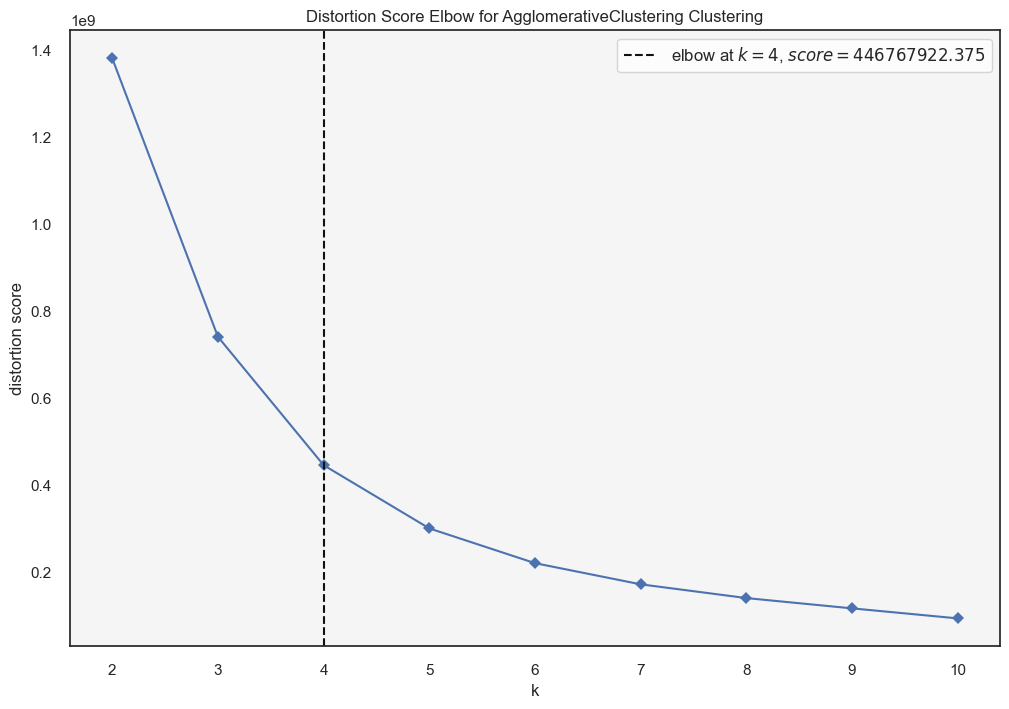

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [607]:
print('Elbow Method to determine the number of clusters to be formed for Agglomerative Clustering:')
Elbow_M = KElbowVisualizer(
    AgglomerativeClustering(),
    k=10,
    locate_elbow=True,
    timings=False
)

# Set a different background color (e.g., light gray)
Elbow_M.ax.set_facecolor("#F5F5F5")

Elbow_M.fit(X_train)
Elbow_M.show()


Elbow Method to determine the number of clusters to be formed for KMeans Clustering:


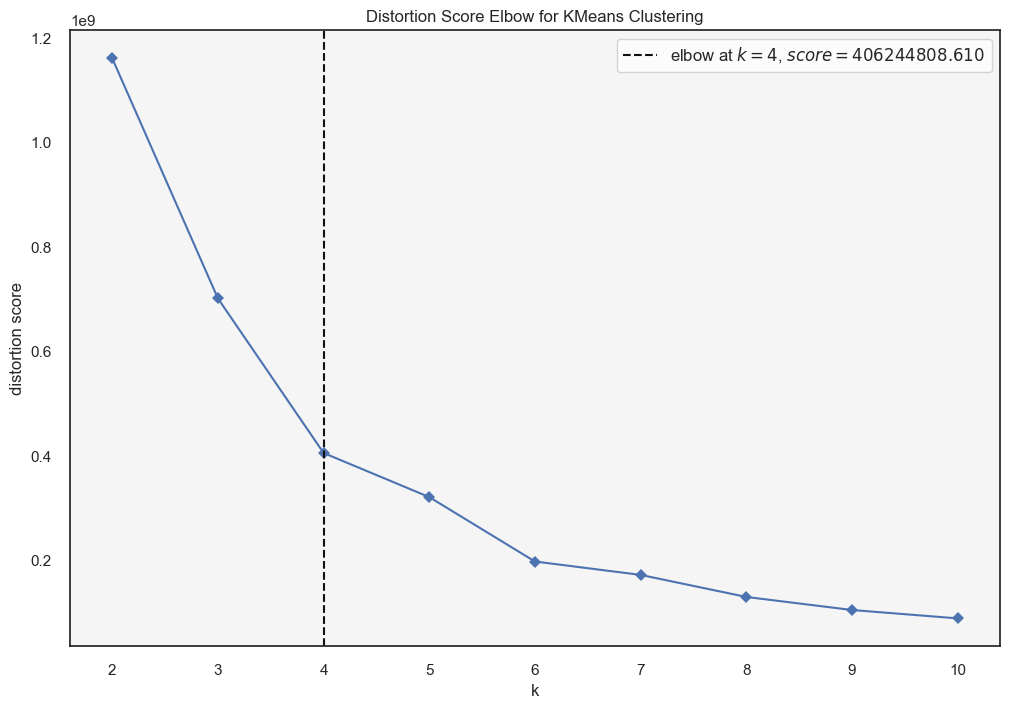

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [608]:
print('Elbow Method to determine the number of clusters to be formed for KMeans Clustering:')
Elbow_M = KElbowVisualizer(
    KMeans(n_init='auto'),
    locate_elbow=True,
    timings=False,
)

# Set a different background color (e.g., light gray)
Elbow_M.ax.set_facecolor("#F5F5F5")

Elbow_M.fit(X_train)
Elbow_M.show()


Horrifying distortion score for both clustering techniques. Try with PCA dimensionality reduced matrix, if there is >10% improvement, proceed henceforth with PCA-ed matrix.

### Dimensionality Reduction -- Principal Component Analysis

KIV: can include gridsearch/ kfold validation here to determine best number of PCA

In [609]:
from sklearn.decomposition import PCA

# Perform PCA with 10 components on the standard scaled dataset
pca = PCA(n_components=10, random_state=0)
pca.fit(X_train)

# Create a DataFrame to store the PCA results
PCA_ds = pd.DataFrame(pca.transform(X_train), 
                      columns=["col1", "col2", "col3","col4","col5",'col6','col7','col8','col9','col10'])

# Display summary statistics of the PCA results
PCA_summary = PCA_ds.describe().T
print(PCA_summary)

        count          mean         std          min         25%         50%  \
col1   4328.0 -1.344909e-14  749.888761  -277.382078 -251.884132 -194.442231   
col2   4328.0 -6.724545e-15  101.906944 -1103.176555    0.695507   16.752606   
col3   4328.0 -1.260852e-15   52.888787  -873.339078   -2.580678    4.232178   
col4   4328.0  6.304261e-15   48.643124  -549.564465   -2.887464    5.713521   
col5   4328.0  6.724545e-15   39.281922  -284.361747   -7.867619   -3.386544   
col6   4328.0 -1.523530e-15   16.009893  -272.251002   -1.280830   -0.728252   
col7   4328.0  4.360447e-15   11.198483  -171.805160   -2.212229    0.590119   
col8   4328.0  2.107987e-15   10.554518  -187.116898   -1.528509   -0.010651   
col9   4328.0  9.456391e-16    8.571925   -90.822671   -2.365339    1.040003   
col10  4328.0  1.786207e-15    8.271804   -76.522660   -3.538600    1.060419   

             75%           max  
col1  -43.645209  21853.682267  
col2   22.162322   4434.765946  
col3    6.374326   1

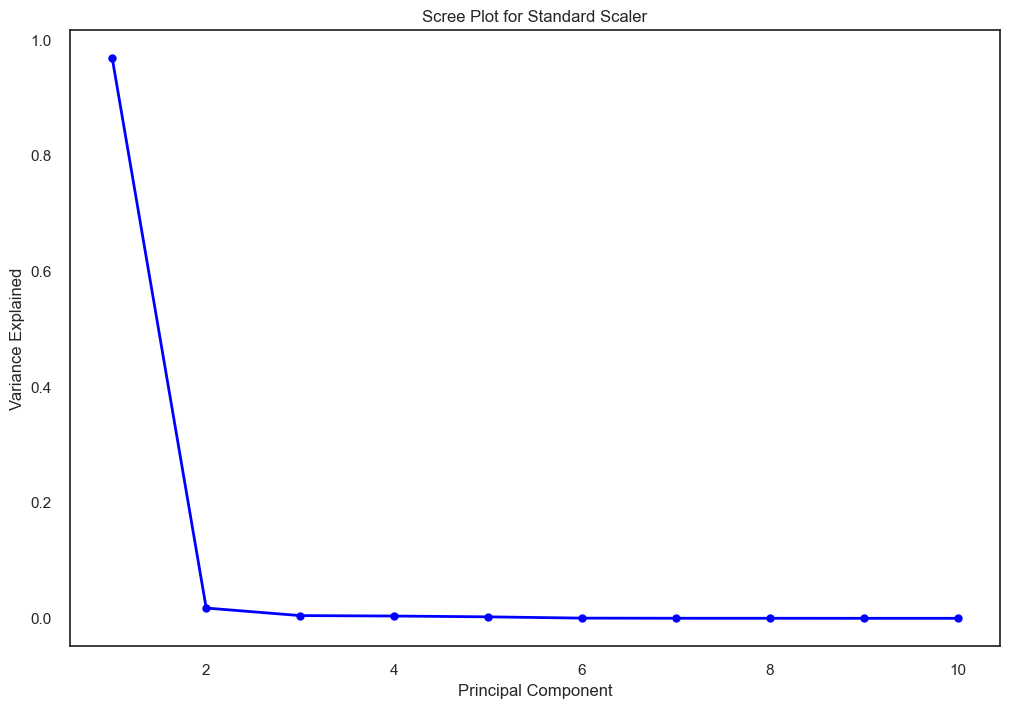

In [610]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot for Standard Scaler')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Ideal PC = 2 for minmax() scaled auto FE

In [611]:
# Perform PCA with 2 components on the standard scaled dataset
pca = PCA(n_components=2, random_state=0)
pca.fit(X_train)

# Create a DataFrame to store the PCA results
PCA_ds = pd.DataFrame(pca.transform(X_train), 
                      columns=["col1", "col2"])

# Display summary statistics of the PCA results
PCA_summary = PCA_ds.describe().T
print(PCA_summary)

       count          mean         std          min         25%         50%  \
col1  4328.0  1.344909e-14  749.888761  -277.382078 -251.884132 -194.442231   
col2  4328.0 -5.883977e-15  101.906944 -1103.176555    0.695507   16.752606   

            75%           max  
col1 -43.645209  21853.682267  
col2  22.162322   4434.765946  


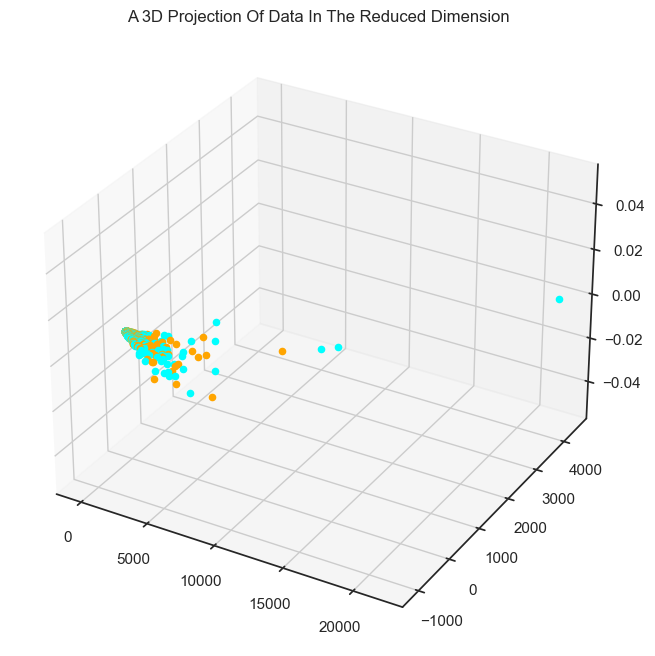

In [612]:
# Import necessary libraries
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D projection

# Extract the PCA components
x = PCA_ds["col1"]
y = PCA_ds["col2"]

# Define colors for the scatter plot
colors = ["orange", "cyan"]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot with bright colors
for i in range(len(x)):
    ax.scatter(x[i], y[i], c=colors[i % len(colors)], marker="o")

# Set the title
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")

# Show the plot
plt.show()

what is this lol

Elbow Method to determine the number of clusters to be formed with Agglomerative CLustering and PCA:


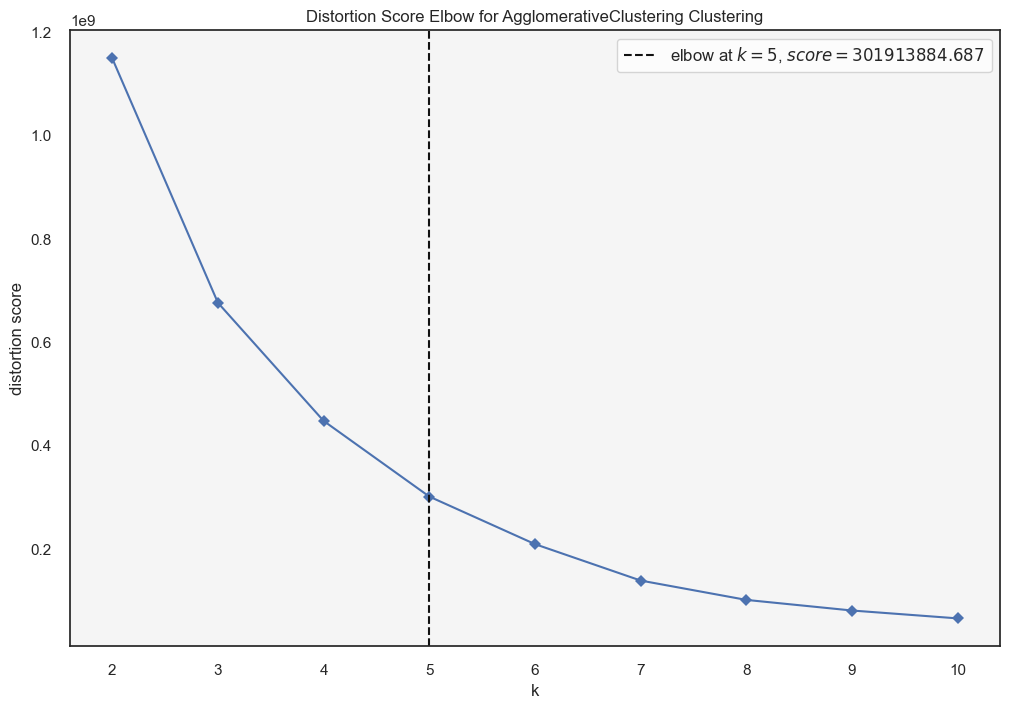

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [613]:
print('Elbow Method to determine the number of clusters to be formed with Agglomerative CLustering and PCA:')
Elbow_M = KElbowVisualizer(
    AgglomerativeClustering(),
    k=10,
    locate_elbow=True,
    timings=False
)

# Set a different background color (e.g., light gray)
Elbow_M.ax.set_facecolor("#F5F5F5")

Elbow_M.fit(PCA_ds)
Elbow_M.show()

Elbow Method to determine the number of clusters to be formed for KMeans Clustering:


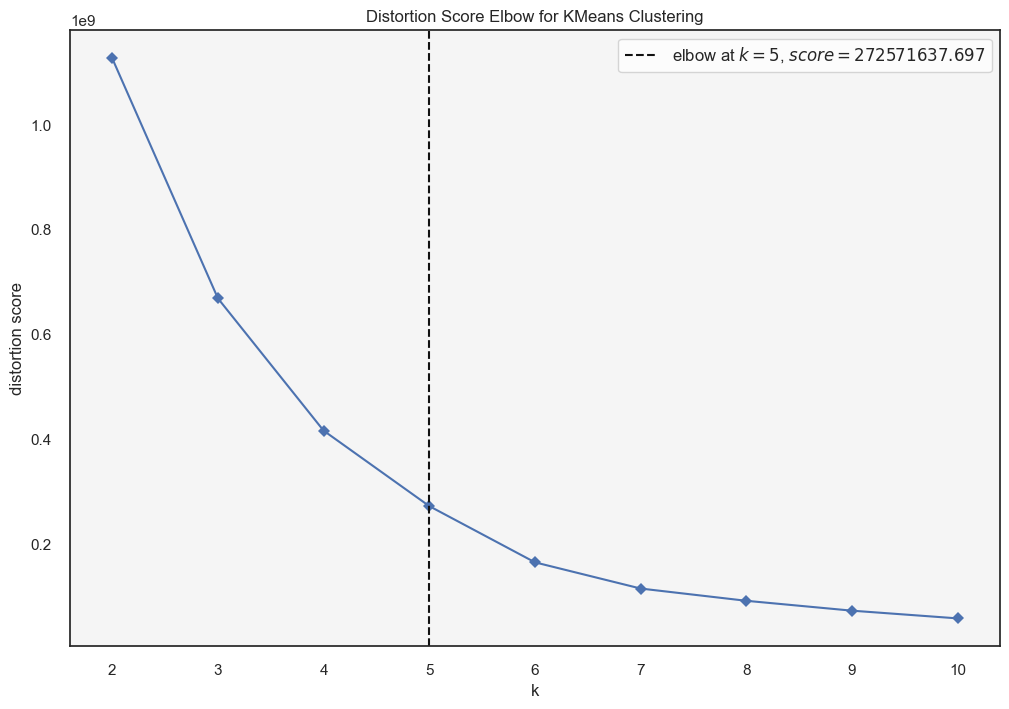

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [614]:
print('Elbow Method to determine the number of clusters to be formed for KMeans Clustering:')
Elbow_M = KElbowVisualizer(
    KMeans(n_init='auto'),
    locate_elbow=True,
    timings=False,
)

# Set a different background color (e.g., light gray)
Elbow_M.ax.set_facecolor("#F5F5F5")

Elbow_M.fit(PCA_ds)
Elbow_M.show()


Significant improvment in performance but overall still objectively bad. Anyway, fit to continue with PCA processed dataset with5 clusters for both kmeans and agglomerative clustering.

#### Agglomerative Clustering with 5 clusters

In [615]:
# Initialize the Agglomerative Clustering model with 5 clusters
AC = AgglomerativeClustering(n_clusters=5)

# Fit the model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)

# Add the cluster labels to the PCA DataFrame
PCA_ds["Clusters"] = yhat_AC

# Add the Clusters feature to the original DataFrame
X_train["Clusters"] = yhat_AC

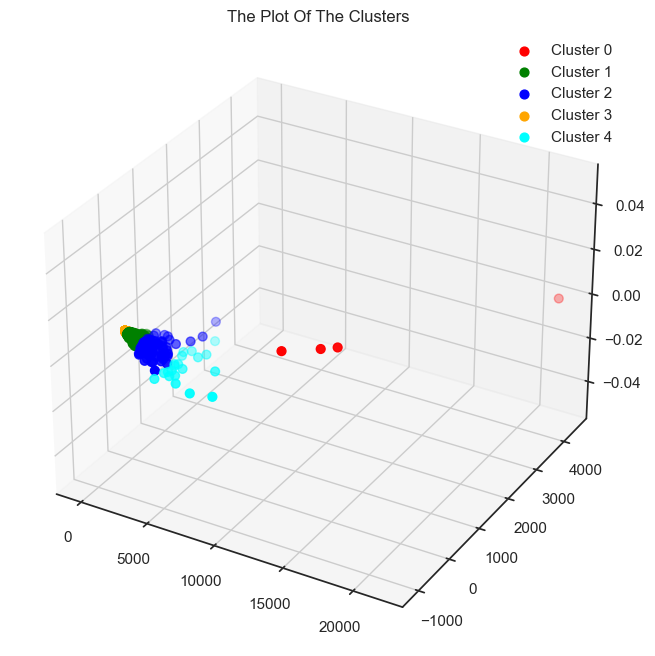

In [616]:
# Extract the PCA components
x = PCA_ds["col1"]
y = PCA_ds["col2"]

# Define colors for the clusters
colors = ["red", "green", "blue", "orange", "cyan"]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d', label="bla")

# Scatter plot with cluster-specific colors
for cluster_id in range(len(colors)):
    cluster_data = PCA_ds[PCA_ds["Clusters"] == cluster_id]
    ax.scatter(
        cluster_data["col1"],
        cluster_data["col2"],
        s=40,
        c=colors[cluster_id],
        marker='o',
        label=f'Cluster {cluster_id}'
    )

# Set the title
ax.set_title("The Plot Of The Clusters")

# Add a legend
ax.legend()

# Show the plot
plt.show()


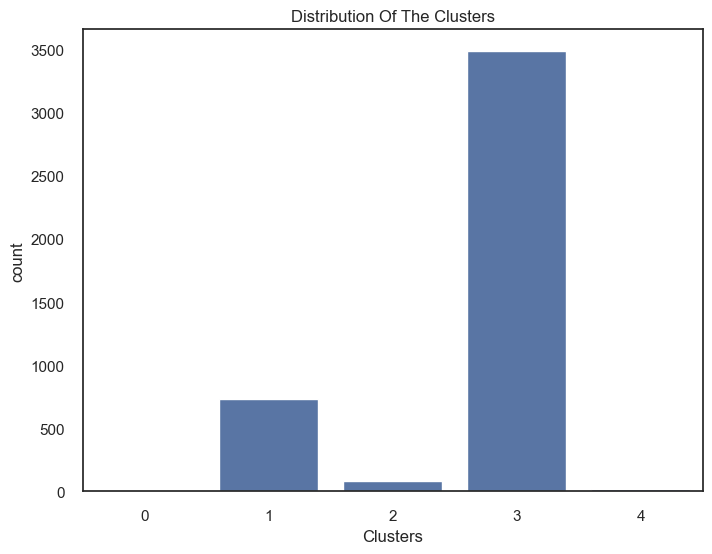

In [617]:
# Create a countplot of the cluster distribution
plt.figure(figsize=(8, 6))
countplot = sns.countplot(x=X_train["Clusters"])

# Set the title
countplot.set_title("Distribution Of The Clusters")

# Show the plot
plt.show()

In [618]:
len(X_train[X_train["PotentialFraud"]==0])/ len(X_train[X_train["PotentialFraud"]==1])

9.793017456359102

In [619]:
X_train.groupby(['Clusters', 'PotentialFraud']).count()

COUNT(X_train)  MAX(X_train.AdmitForDays)  \
Clusters PotentialFraud                                              
0        1                            4                          4   
1        0                          565                        565   
         1                          169                        169   
2        0                           43                         43   
         1                           40                         40   
3        0                         3319                       3319   
         1                          168                        168   
4        1                           20                         20   

                         MAX(X_train.Age)  MAX(X_train.AttendingPhysician_ce)  \
Clusters PotentialFraud                                                         
0        1                              4                                   4   
1        0                            565                                 565   
         1                            169                                 169   
2        0                             43                                  43   
         1                             40                                  40   
3        0                           3319                                3319   
         1                            168                                 168   
4        1                             20                                  20   

                         MAX(X_train.ChronicCond_Alzheimer)  \
Clusters PotentialFraud                                       
0        1                                                4   
1        0                                              565   
         1                                              169   
2        0                                               43   
         1                                               40   
3        0                                             3319   
         1                                              168   
4        1                                               20   

                         MAX(X_train.ChronicCond_Cancer)  \
Clusters PotentialFraud                                    
0        1                                             4   
1        0                                           565   
         1                                           169   
2        0                                            43   
         1                                            40   
3        0                                          3319   
         1                                           168   
4        1                                            20   

                         MAX(X_train.ChronicCond_Depression)  \
Clusters PotentialFraud                                        
0        1                                                 4   
1        0                                               565   
         1                                               169   
2        0                                                43   
         1                                                40   
3        0                                              3319   
         1                                               168   
4        1                                                20   

                         MAX(X_train.ChronicCond_Diabetes)  \
Clusters PotentialFraud                                      
0        1                                               4   
1        0                                             565   
         1                                             169   
2        0                                              43   
         1                                              40   
3        0                                            3319   
         1                                             168   
4        1                                              20   

                   

Severe class imbalance that does not closely reflect distribution of fraud in data, but it does seem that cluster 3 has a greater proportion and distribution of non-frauds. This means that observations without characteristics similar to cluster 3 can be considered suspicious.

#### KMeans Clustering with 5 clusters

In [648]:
# Initialize the Agglomerative Clustering model with 5 clusters
KM = KMeans(n_clusters=5, n_init='auto')

# Fit the model and predict clusters
yhat_KM = KM.fit_predict(PCA_ds)

# Add the cluster labels to the PCA DataFrame
PCA_ds["Clusters"] = yhat_KM

# Add the Clusters feature to the original DataFrame
X_train["Clusters"] = yhat_KM

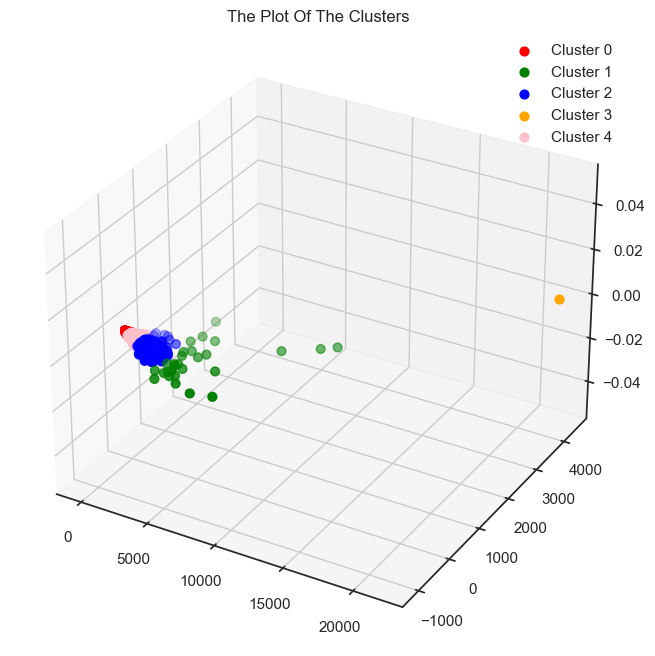

In [649]:
# Extract the PCA components
x = PCA_ds["col1"]
y = PCA_ds["col2"]

# Define colors for the clusters
colors = ["red", "green", "blue", "orange", "pink"]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d', label="bla")

# Scatter plot with cluster-specific colors
for cluster_id in range(len(colors)):
    cluster_data = PCA_ds[PCA_ds["Clusters"] == cluster_id]
    ax.scatter(
        cluster_data["col1"],
        cluster_data["col2"],
        s=40,
        c=colors[cluster_id],
        marker='o',
        label=f'Cluster {cluster_id}'
    )

# Set the title
ax.set_title("The Plot Of The Clusters")

# Add a legend
ax.legend()

# Show the plot
plt.show()


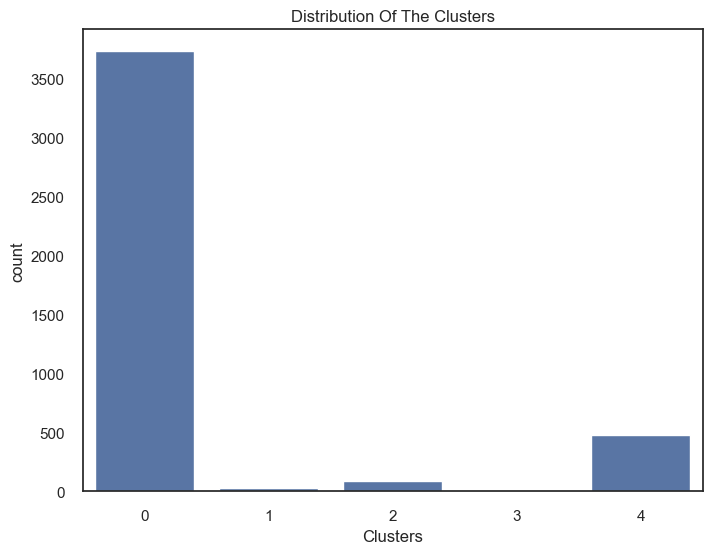

In [650]:
# Create a countplot of the cluster distribution
plt.figure(figsize=(8, 6))
countplot = sns.countplot(x=X_train["Clusters"])

# Set the title
countplot.set_title("Distribution Of The Clusters")

# Show the plot
plt.show()

In [623]:
X_train.groupby(['Clusters', 'PotentialFraud']).count()

COUNT(X_train)  MAX(X_train.AdmitForDays)  \
Clusters PotentialFraud                                              
0        0                         3756                       3756   
         1                          281                        281   
1        1                           42                         42   
2        0                          171                        171   
         1                           77                         77   
3        1                            1                          1   

                         MAX(X_train.Age)  MAX(X_train.AttendingPhysician_ce)  \
Clusters PotentialFraud                                                         
0        0                           3756                                3756   
         1                            281                                 281   
1        1                             42                                  42   
2        0                            171                                 171   
         1                             77                                  77   
3        1                              1                                   1   

                         MAX(X_train.ChronicCond_Alzheimer)  \
Clusters PotentialFraud                                       
0        0                                             3756   
         1                                              281   
1        1                                               42   
2        0                                              171   
         1                                               77   
3        1                                                1   

                         MAX(X_train.ChronicCond_Cancer)  \
Clusters PotentialFraud                                    
0        0                                          3756   
         1                                           281   
1        1                                            42   
2        0                                           171   
         1                                            77   
3        1                                             1   

                         MAX(X_train.ChronicCond_Depression)  \
Clusters PotentialFraud                                        
0        0                                              3756   
         1                                               281   
1        1                                                42   
2        0                                               171   
         1                                                77   
3        1                                                 1   

                         MAX(X_train.ChronicCond_Diabetes)  \
Clusters PotentialFraud                                      
0        0                                            3756   
         1                                             281   
1        1                                              42   
2        0                                             171   
         1                                              77   
3        1                                               1   

                         MAX(X_train.ChronicCond_Heartfailure)  \
Clusters PotentialFraud                                          
0        0                                                3756   
         1                                                 281   
1        1                                                  42   
2        0                                                 171   
         1                                                  77   
3        1                                                   1   

                         MAX(X_train.ChronicCond_IschemicHeart)  \
Clusters PotentialFraud                                           
0        0                                                 3756   
         1                                                  281   
1        1            

Cluster 1 has the highest number of frauds:non frauds ratio -- perhaps observations close to cluster 1 might be fradulent.

In [624]:
# to explain the characteristics of the clusters, get columns with top 5 variance
column_variances = X_train.var()
sorted_columns = column_variances.sort_values(ascending=False)
top_10_columns = sorted_columns.head(10)
cols = top_10_columns.index.tolist()
cols.append('PotentialFraud')

In [625]:
x= X_train.groupby('Clusters')[cols].sum()
count = X_train.groupby('Clusters')['Clusters'].count()
x = x.div(count, axis=0) 
x

,COUNT(X_train),SUM(X_train.NoOfMonths_PartBCov),SUM(X_train.NoOfMonths_PartACov),SUM(X_train.DiagnosisGroupCode_ce),SUM(X_train.ChronicCond_IschemicHeart),SUM(X_train.ChronicCond_Diabetes),SUM(X_train.Age),SUM(X_train.ChronicCond_Heartfailure),SUM(X_train.Gender),SUM(X_train.State),PotentialFraud
Clusters,,,,,,,,,,,
0,53.127322,52.834840,52.793535,47.161227,40.553877,37.663859,33.748582,31.609611,30.697052,24.402115,0.069606
1,1983.047619,1972.571429,1973.599206,1907.940732,1499.523810,1385.309524,1265.914603,1162.857143,1144.047619,913.865229,1.000000
2,571.221774,568.594086,568.022513,547.769880,432.056452,401.620968,364.115806,335.342742,331.931452,278.852708,0.310484
3,8240.0,8217.916667,8186.166667,8240.000000,6074.000000,5784.000000,5375.920000,4638.000000,4698.000000,637.452830,1.000000


## Multilayer Perceptron

In [626]:
#mlp
import torch
from torch import nn
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping
from keras.metrics import Recall, Precision, F1Score, AUC, Accuracy
from keras.layers import LeakyReLU
from keras.losses import MeanSquaredError
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import load_model
from bayes_opt import BayesianOptimization


In [627]:
# from the previous clustering, remove if done independently
X_train.drop('Clusters', axis=1, inplace=True)

In [628]:
# convert entire dataframe to float64 to fit into tensor
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

In [629]:
train = X_train.copy()
X_train = train.drop('PotentialFraud', axis=1)
Y_train = train['PotentialFraud']

test = X_test.copy()
X_test = test.drop('PotentialFraud', axis=1)
Y_test = test['PotentialFraud']

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4328, 295)
(4328,)
(1082, 295)
(1082,)


In [630]:
from sklearn.model_selection import train_test_split

# split training set into train and validation set with 90:10 ratio for k-fold validation
X_train_nn, X_val_nn, Y_train_nn, Y_val_nn = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

print(X_train_nn.shape)
print(X_val_nn.shape)
print(Y_train_nn.shape)
print(Y_val_nn.shape)

(3895, 295)
(433, 295)
(3895,)
(433,)


In [631]:
#in hope of getting reproducible results
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(42)

In [632]:
# Create function to find the best model based on Area Under Curve
def nn_bayesopt(neurons, activation, optimizer, learning_rate, batch_size, epochs, layers1, layers2, dropout, dropout_rate):
    
    #some common optimizers and activation function
    optimizerL = ['Adam', 'RMSprop']
    optimizerD= {'Adam':Adam(learning_rate==learning_rate), 'RMSprop':RMSprop(learning_rate=learning_rate)}
    activationL = ['relu', 'sigmoid', 'tanh', 'elu', LeakyReLU]
    
    #choosing which optimizer to use based on numbers
    activation = activationL[round(activation)]
    optimizer = optimizerD[optimizerL[round(optimizer)]]
    
    #relevant hyperparameters
    batch_size = round(batch_size)
    epochs = round(epochs)
    
    #structure of nn
    neurons = round(neurons)
    layers1 = round(layers1)
    layers2 = round(layers2)
    
    #nn using keras
    nn = Sequential()
    #input layer + first hidden layer (29 features)
    nn.add(Dense(neurons, input_dim=X_train_nn.shape[1], activation=activation))
    for i in range(layers1):
        nn.add(Dense(neurons, activation=activation))
    if dropout > 0.5:
        nn.add(Dropout(dropout_rate, seed=42))
    for i in range(layers2):
        nn.add(Dense(neurons, activation=activation))
    #output layer with 1 output
    nn.add(Dense(1, activation='sigmoid'))

    nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[AUC()])

    es = EarlyStopping(monitor='val_loss', verbose=0, patience=20)
    
    nn.fit(X_train_nn, Y_train_nn, validation_data=(X_val_nn, Y_val_nn), epochs=epochs, batch_size=batch_size, verbose=0, callbacks=[es])
    
    # AUC score for binary classification determining the best model
    score, auc = nn.evaluate(X_val_nn, Y_val_nn, verbose=0)

    return auc

In [633]:
params_nn = {
    'neurons': (1, 35),
    'activation':(0, 4),
    'optimizer':(0,1),
    'learning_rate':(0.001, 0.2),
    'batch_size':(128, 1500),
    'epochs':(30, 150),
    'layers1':(0,1),
    'layers2':(0,2),
    'dropout':(0,1),
    'dropout_rate':(0,0.2),
}

# Run Bayesian Optimization
nn_bo = BayesianOptimization(nn_bayesopt, params_nn, random_state=42)
nn_bo.maximize(init_points=20, n_iter=10)

|   iter    |  target   | activa... | batch_... |  dropout  | dropou... |  epochs   |  layers1  |  layers2  | learni... |  neurons  | optimizer |
-------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.5       | 1.498     | 1.432e+03 | 0.732     | 0.1197    | 48.72     | 0.156     | 0.1162    | 0.1734    | 21.44     | 0.7081    |
| 2         | 0.5       | 0.08234   | 1.459e+03 | 0.8324    | 0.04247   | 51.82     | 0.1834    | 0.6085    | 0.1054    | 15.69     | 0.2912    |
| 3         | 0.5       | 2.447     | 319.4     | 0.2921    | 0.07327   | 84.73     | 0.7852    | 0.3993    | 0.1033    | 21.14     | 0.04645   |
| 4         | 0.5       | 2.43      | 362.0     | 0.06505   | 0.1898    | 145.9     | 0.8084    | 0.6092    | 0.02044   | 24.26     | 0.4402    |
| 5         | 0.5       | 0.4882    | 807.4     | 0.03439   | 0.1819    | 61.05     | 0.6625    | 0.6234    | 0.1045    | 19

In [634]:
#get best params
params_nn = nn_bo.max['params']

learning_rate = params_nn['learning_rate']
activationL = ['relu', 'sigmoid', 'tanh', 'elu', LeakyReLU]
params_nn['activation'] = activationL[round(params_nn['activation'])]

params_nn['batch_size'] = round(params_nn['batch_size'])
params_nn['epochs'] = round(params_nn['epochs'])

params_nn['layers1'] = round(params_nn['layers1'])
params_nn['layers2'] = round(params_nn['layers2'])
params_nn['neurons'] = round(params_nn['neurons'])

optimizerL = ['Adam', 'RMSprop']
optimizerD= {'Adam':Adam(learning_rate==learning_rate), 'RMSprop':RMSprop(learning_rate=learning_rate)}
params_nn['optimizer'] = optimizerD[optimizerL[round(params_nn['optimizer'])]]

print(params_nn)

{'activation': <keras.src.layers.activation.leaky_relu.LeakyReLU object at 0x1b09fe290>, 'batch_size': 473, 'dropout': 0.49724850589238545, 'dropout_rate': 0.06017566196335394, 'epochs': 64, 'layers1': 0, 'layers2': 1, 'learning_rate': 0.10103312562254345, 'neurons': 3, 'optimizer': <keras.src.optimizers.adam.Adam object at 0x1bd965d90>}


In [635]:
#hyperparameters
best_params = params_nn
activation = best_params["activation"]
batch_size =  best_params["batch_size"]
dropout = best_params["dropout"]

dropout_rate = best_params["dropout_rate"]
epochs = best_params["epochs"]
layers1 = best_params["layers1"]
layers2 = best_params["layers2"]
neurons = best_params["neurons"]
optimizer = best_params["optimizer"]

In [636]:
from sklearn.metrics import roc_curve, classification_report, accuracy_score

# hyperparameter and parameter tuned model
nn = Sequential()
#input layer + first hidden layer
nn.add(Dense(neurons, input_dim=X_train_nn.shape[1], activation=activation))
#hidden layer
for i in range(layers1):
    nn.add(Dense(neurons, activation=activation))
if dropout > 0.5:
    nn.add(Dropout(dropout_rate, seed=42))
for i in range(layers2):
    nn.add(Dense(neurons, activation=activation))
#output layer with 2 outputs
nn.add(Dense(1, activation='sigmoid'))
nn.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=[Precision(), Recall(), 'accuracy', F1Score()])
es = EarlyStopping(monitor='val_loss', verbose=0, patience=20)
nn.fit(X_train_nn, Y_train_nn, validation_data=(X_val_nn, Y_val_nn), epochs=epochs, batch_size=batch_size, verbose=0, callbacks=[es])   

#### Finding the best threshold

In [637]:
def evaluate_model(model_name, train_model, x_eval_df, y_eval_df, threshold):
   loss, precision, recall, accuracy, F1  = train_model.evaluate(x_eval_df, y_eval_df, verbose=0)
   
   results_dict = {
   "Precision": precision,
    "Recall": recall,
    "Accuracy": accuracy,
    "F1 score": F1
    }
   
   predictions = train_model.predict(x_eval_df)
   Y_pred = np.where(predictions > threshold, 1, 0)
   # get accuracy score based on custom threshold
   accuracy_custom = accuracy_score(y_eval_df, Y_pred) 

   print(f'Classification report for {model_name}: \n{classification_report(y_eval_df, Y_pred)}')
   
   return pd.DataFrame(results_dict, index=[model_name]), accuracy_custom

In [638]:
# evaluate model on default threshold
train_eval_nn = evaluate_model("MLP Training set eval", nn, X_train_nn, Y_train_nn, 0.5)
test_eval_nn = evaluate_model("MLP Testing set eval", nn, X_test, Y_test, 0.5)

122/122 [==============================] - 0s 712us/step
Classification report for MLP Training set eval: 
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      3539
         1.0       0.75      0.46      0.57       356

    accuracy                           0.94      3895
   macro avg       0.85      0.72      0.77      3895
weighted avg       0.93      0.94      0.93      3895

34/34 [==============================] - 0s 840us/step
Classification report for MLP Testing set eval: 
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       977
         1.0       0.69      0.46      0.55       105

    accuracy                           0.93      1082
   macro avg       0.81      0.72      0.75      1082
weighted avg       0.92      0.93      0.92      1082



In [639]:
# overall accuracy
results = pd.concat([train_eval_nn[0], test_eval_nn[0]])
results

,Precision,Recall,Accuracy,F1 score
MLP Training set eval,0.746544,0.455056,0.936072,0.167490
MLP Testing set eval,0.685714,0.457143,0.926987,0.176917


Terrible F1 score

Finding optimal threshold with Youden's index

34/34 [==============================] - 0s 1ms/step


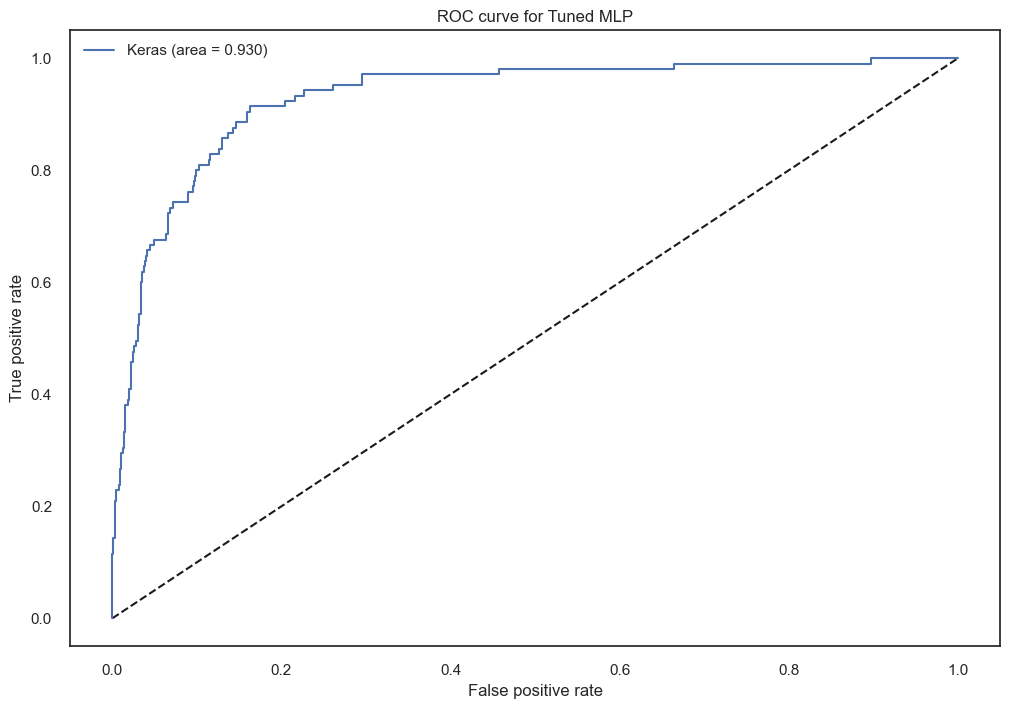

In [640]:
# finding threshold based on Youden's index 
y_pred_keras = nn.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Tuned MLP')
plt.legend(loc='best')
plt.show()

In [641]:
# Calculate the Youden's index at each threshold setting
j_scores = tpr_keras - fpr_keras

# Find the index of the threshold setting that maximizes the Youden's index
optimal_idx = np.argmax(j_scores)

# Get the optimal threshold value using the index
youdens_threshold = thresholds_keras[optimal_idx]

# Print the optimal threshold
print(youdens_threshold)

0.05656031


In [642]:
#get best params
params_nn = nn_bo.max['params']

learning_rate = params_nn['learning_rate']
activationL = ['relu', 'sigmoid', 'tanh', 'elu', LeakyReLU]
params_nn['activation'] = activationL[round(params_nn['activation'])]

params_nn['batch_size'] = round(params_nn['batch_size'])
params_nn['epochs'] = round(params_nn['epochs'])

params_nn['layers1'] = round(params_nn['layers1'])
params_nn['layers2'] = round(params_nn['layers2'])
params_nn['neurons'] = round(params_nn['neurons'])

optimizerL = ['Adam', 'RMSprop']
optimizerD= {'Adam':Adam(learning_rate==learning_rate), 'RMSprop':RMSprop(learning_rate=learning_rate)}
params_nn['optimizer'] = optimizerD[optimizerL[round(params_nn['optimizer'])]]

#hyperparameters
best_params = params_nn
activation = best_params["activation"]
batch_size =  best_params["batch_size"]
dropout = best_params["dropout"]

dropout_rate = best_params["dropout_rate"]
epochs = best_params["epochs"]
layers1 = best_params["layers1"]
layers2 = best_params["layers2"]
neurons = best_params["neurons"]
optimizer = best_params["optimizer"]

# final tuned model, inclusive of optimal threshold
nn_youden = Sequential()
#input layer + first hidden layer
nn.add(Dense(neurons, input_dim=X_train_nn.shape[1], activation=activation))
#hidden layer
for i in range(layers1):
    nn_youden.add(Dense(neurons, activation=activation))
if dropout > 0.5:
    nn_youden.add(Dropout(dropout_rate, seed=42))
for i in range(layers2):
    nn_youden.add(Dense(neurons, activation=activation))
#output layer with 2 outputs
nn_youden.add(Dense(1, activation='sigmoid'))

# extract evaluation scores based on optimal threshold
nn_youden.compile(optimizer=optimizer, loss="binary_crossentropy", 
                 metrics=[Precision(thresholds=youdens_threshold), Recall(thresholds=youdens_threshold), 'accuracy', F1Score()])
es = EarlyStopping(monitor='val_loss', verbose=0, patience=20)
nn_youden.fit(X_train_nn, Y_train_nn, validation_data=(X_val_nn, Y_val_nn), epochs=epochs, batch_size=batch_size, verbose=0, callbacks=[es])   

In [643]:
# assign youden's threshold 
train_eval_nn = evaluate_model("MLP Training set eval", nn_youden, X_train_nn, Y_train_nn, youdens_threshold)
test_eval_nn = evaluate_model("MLP Testing set eval", nn_youden, X_test, Y_test, youdens_threshold)

youdens_threshold_accuracy = test_eval_nn[1]

122/122 [==============================] - 0s 770us/step
Classification report for MLP Training set eval: 
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      3539
         1.0       0.49      0.80      0.61       356

    accuracy                           0.91      3895
   macro avg       0.74      0.86      0.78      3895
weighted avg       0.93      0.91      0.92      3895

34/34 [==============================] - 0s 2ms/step
Classification report for MLP Testing set eval: 
              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94       977
         1.0       0.47      0.80      0.59       105

    accuracy                           0.89      1082
   macro avg       0.72      0.85      0.76      1082
weighted avg       0.93      0.89      0.90      1082



In [644]:
# overall accuracy
results = pd.concat([train_eval_nn[0], test_eval_nn[0]])
results

,Precision,Recall,Accuracy,F1 score
MLP Training set eval,0.493913,0.797753,0.937869,0.168043
MLP Testing set eval,0.466667,0.800000,0.925139,0.177665


Terrible F1 score and precision, stick to default threshold instead